# Classification Benchmarking

**The goal of this notebook is to benchmark different algorithms on the classification of the toy dataset, before moving to the next stage that is using them for our real data on the autistic project.**


The algorithms that will be tested are:

* The baseline algorithm is the use of `imputations` techniques (let's say MICE, or Matias' technic) both at training and for the inference.

    
* Imputation using Matias' `custom_imputations` method, that resorts on pdf estimation with kernel. The model is a k dimensional distribution, estimating using a gaussian kernel with optimal bandwidth, handling missing coordinates by imputing them based on the proximity with other data from the training set. The inference for a sample is performed on the subset of coordinates that are known, by computing first the marginal of the k-dimensional distribution on the known axis. Note here that no imputation are performed at inference time, but there are during training. 
        
* The `no_imputations` approach will be used, which consist in estimating several distributions, $f_{X|Z}$, and doing inference using them. No imputation are performed, and the marginals are not used (yet). 
    
* The use of `neural_additive_models` developed in [1] will be tested. This method present an interpretable way of using neural network in this setting.
    
* The use of `XGBoost` will be tested. 



Also, direct use of the $Z$ distributions will be used for classification, usinf 

<ins>Inputs:</ins>

* $(X_n)_n \in \mathbb{R}^K$


* $(Z_n)_n \in [ 0, 1]^K $


<ins>Outputs:</ins>

* $(Y_n)_n \in [ 0, 1]$

We would like to show:

* Do a benchmarking of the different methods. 
* If encoding the Nans, is it necessary to add the Z variables ?
* SEE TABLE and come up with experiments. 


    
    
<ins>Takeaways:</ins>

    * Handling missing data is better than discarding them.
    * ...

[1]. Agarwal, R. et al. Neural Additive Models: Interpretable Machine Learning with Neural Nets. Arxiv (2020).

In [91]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


# Introduction - Dataset definition

In [78]:
# Dataset default parameters
dataset_name = 'moons'
num_samples = NUM_SAMPLES
imbalance_ratio = IMBALANCE_RATIO

# Missingness default parameters
missingness_pattern = 5
ratio_of_missing_values = RATIO_OF_MISSING_VALUES
ratio_missing_per_class = RATIO_MISSING_PER_CLASS
# pdf estimation default parameters
resolution = RESOLUTION
bandwidth = BANDWIDTH

# Classification default parameters
proportion_train = PROPORTION_TRAIN
missing_data_handling = MISSING_DATA_HANDLING
imputation_method = DEFAULT_IMPUTATION_METHOD

# VERBOSITY
verbosity=4

**Creation of the dataset**

/!\. Missingness constraints were ambitious. Try lower them to reach the desired criteria.
Class 0 - Ratio of number-wise missing data 0.10000 (thres. 0.1)
Class 1 - Ratio of number-wise missing data 0.07880 (thres. 0.3)
Splitting dataset into test and train set.


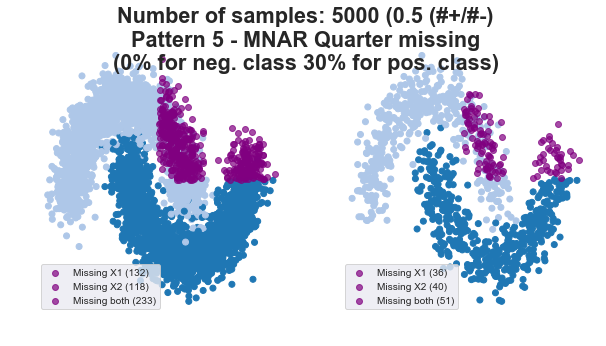

In [79]:
dataset = DatasetGenerator(dataset_name=dataset_name, 
                            num_samples=num_samples, 
                            imbalance_ratio=imbalance_ratio, 
                            missing_data_handling=missing_data_handling,
                            imputation_method=imputation_method,
                            verbosity=verbosity)

# Creation of the missingness
dataset.generate_missing_coordinates(missingness_pattern=missingness_pattern, ratio_of_missing_values=ratio_of_missing_values, ratio_missing_per_class=ratio_missing_per_class)

dataset.split_test_train()

_ = dataset.plot(title=True)

# Load df of experiemnts

In [6]:
df = create_df(folder_names=['experiments_24_june_duke', 'experiments_24_june', 'experiments_solidays'])
df_raw=deepcopy(df)

In [23]:
print(len(df_raw))
df_pruned = deepcopy(df.drop_duplicates(subset=['dataset_name', 'approach', 'missing_data_handling', 'imputation_method', 'use_missing_indicator_variables', 'num_samples', 'imbalance_ratio', 'missingness_pattern', 'ratio_of_missing_values']))
print(len(df_pruned))
#df[df.duplicated(subset=['dataset_name', 'approach', 'missing_data_handling', 'imputation_method', 'use_missing_indicator_variables', 'num_samples', 'imbalance_ratio', 'missingness_pattern', 'ratio_of_missing_values'])].sort_values(by=['dataset_name', 'approach', 'missing_data_handling', 'imputation_method', 'use_missing_indicator_variables', 'num_samples', 'imbalance_ratio', 'missingness_pattern', 'ratio_of_missing_values'])

390
160


In [90]:
df_raw[df_raw['FOR'].isna()]


if (dataset_name == 'moons' and missingness_pattern in [3, 5]) or (range_ratio_of_missing_values==0 and missingness_pattern != 1):
    print("Not doing the experiemnt")
    continue

Empty DataFrame
Columns: [dataset_name, experiment_number, approach, missing_data_handling, imputation_method, use_missing_indicator_variables, num_samples, imbalance_ratio, missingness_pattern, missingness_mechanism, ratio_of_missing_values, missing_X1, missing_X2, missing_first_quarter, ratio_missing_per_class_0, ratio_missing_per_class_1, auc, Accuracy, F1, MCC, Sensitivity, Specificity, Precision, PPV, NPV, FNR, FDR, FOR, resolution, bandwidth, estimation_time_0, estimation_time_1]
Index: []

# Experiment 1) the `multi_ditributions` approach

Splitting dataset into test and train set.


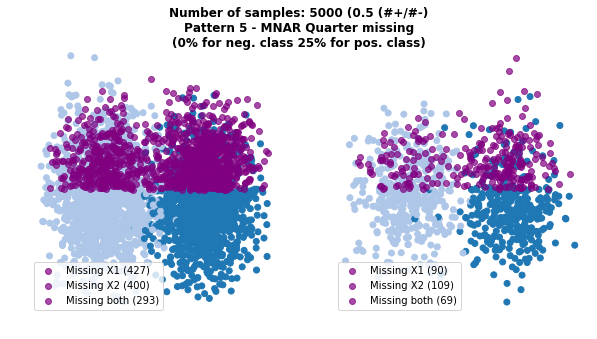

In [11]:
dataset_name='blobs'
approach = 'multi_distributions'

imbalance_ratio=.5
missingness_pattern=5
imputation_method='without'
missing_data_handling='without'
use_missing_indicator_variables=None
ratio_of_missing_values=.5
ratio_missing_per_class=[.1, .25]

num_samples=5000


dataset = DatasetGenerator(dataset_name=dataset_name, 
                                                num_samples=num_samples, 
                                                imbalance_ratio=imbalance_ratio, 
                                                missing_data_handling=missing_data_handling,
                                                imputation_method=imputation_method,
                                                verbosity=verbosity)

# Creation of the missingness
dataset.generate_missing_coordinates(missingness_pattern=missingness_pattern, 
                                     ratio_of_missing_values=ratio_of_missing_values, 
                                     ratio_missing_per_class=ratio_missing_per_class)

dataset.split_test_train()
_ = dataset.plot()

In [ ]:
# Create the experiments
exp = Experiments(dataset_name, 
                  dataset=dataset, 
                  purpose='classification', 
                  approach = approach, 
                  previous_experiment=None, 
                  save_experiment=False, 
                  verbosity=verbosity, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=20, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)


# Estimate the distributions 
exp.fit()

# Estimate the distributions 
exp.predict()

# Plot results
exp.plot()
                        
                

# Experiment 2) The `single_distribution` approaches


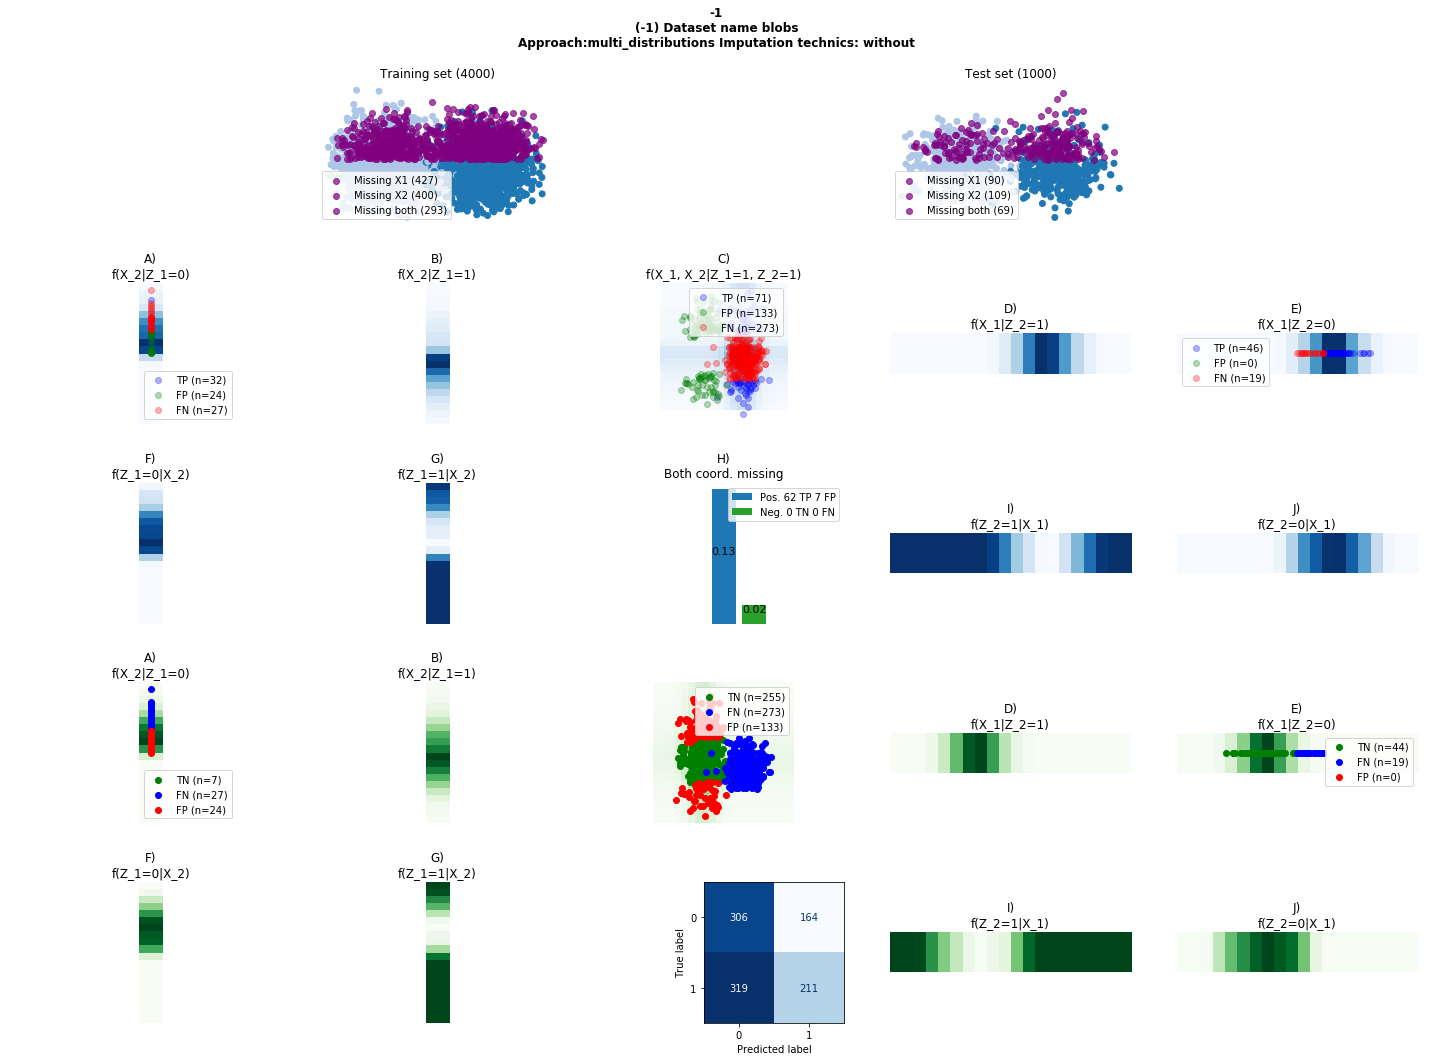

Sample: 530 positive and 470 negative samples (#p/#n=113%)



0
Accuracy                                            0.517
F1 score (2 PPVxTPR/(PPV+TPR))                      0.466
Matthews correlation coefficient (MCC)              0.051
Sensitivity, recall, hit rate, or true positive...  0.398
Specificity, selectivity or true negative rate ...  0.651
Precision or positive predictive value (PPV)        0.563
Negative predictive value (NPV)                     0.490
Miss rate or false negative rate (FNR)              0.602
False discovery rate (FDR=1-PPV)                    0.437
False omission rate (FOR=1-NPV)                     0.510

In [12]:
# Create the experiments
exp = Experiments(dataset_name, 
                  dataset=dataset, 
                  purpose='classification', 
                  approach = approach, 
                  previous_experiment=None, 
                  save_experiment=False, 
                  verbosity=1, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)


# Estimate the distributions 
exp.fit()

# Estimate the distributions 
exp.predict()

# Plot results
exp.plot()

# Experiment 3) Neural Additive Networks

In [ ]:
approach = 'nam'
missing_data_handling='encoding'
imputation_method='without'
use_missing_indicator_variables = True

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset=dataset, 
                  purpose='classification', 
                  approach = approach, 
                  previous_experiment=None, 
                  save_experiment=False, 
                  verbosity=0, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=20, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)


# Estimate the distributions 
exp.fit()

# Estimate the distributions 
exp.predict()

# Plot results
exp.plot()
                        
                

Splitting dataset into test and train set.


RuntimeError: all elements of input should be between 0 and 1

Imputed 4000 values (train) and 1000 (test) using method multi_dimensional_weighting.
Splitting dataset into test and train set.
Imputed 4000 values (train) and 1000 (test) using method multi_dimensional_weighting.
Splitting dataset into test and train set.
Imputed 4000 values (train) and 1000 (test) using method multi_dimensional_weighting.
Splitting dataset into test and train set.
Imputed 4000 values (train) and 1000 (test) using method multi_dimensional_weighting.
Splitting dataset into test and train set.
Imputed 4000 values (train) and 1000 (test) using method multi_dimensional_weighting.
Splitting dataset into test and train set.
Imputed 4000 values (train) and 1000 (test) using method multi_dimensional_weighting.
Splitting dataset into test and train set.
Imputed 4000 values (train) and 1000 (test) using method multi_dimensional_weighting.
Splitting dataset into test and train set.
Imputed 4000 values (train) and 1000 (test) using method multi_dimensional_weighting.
Splitting d

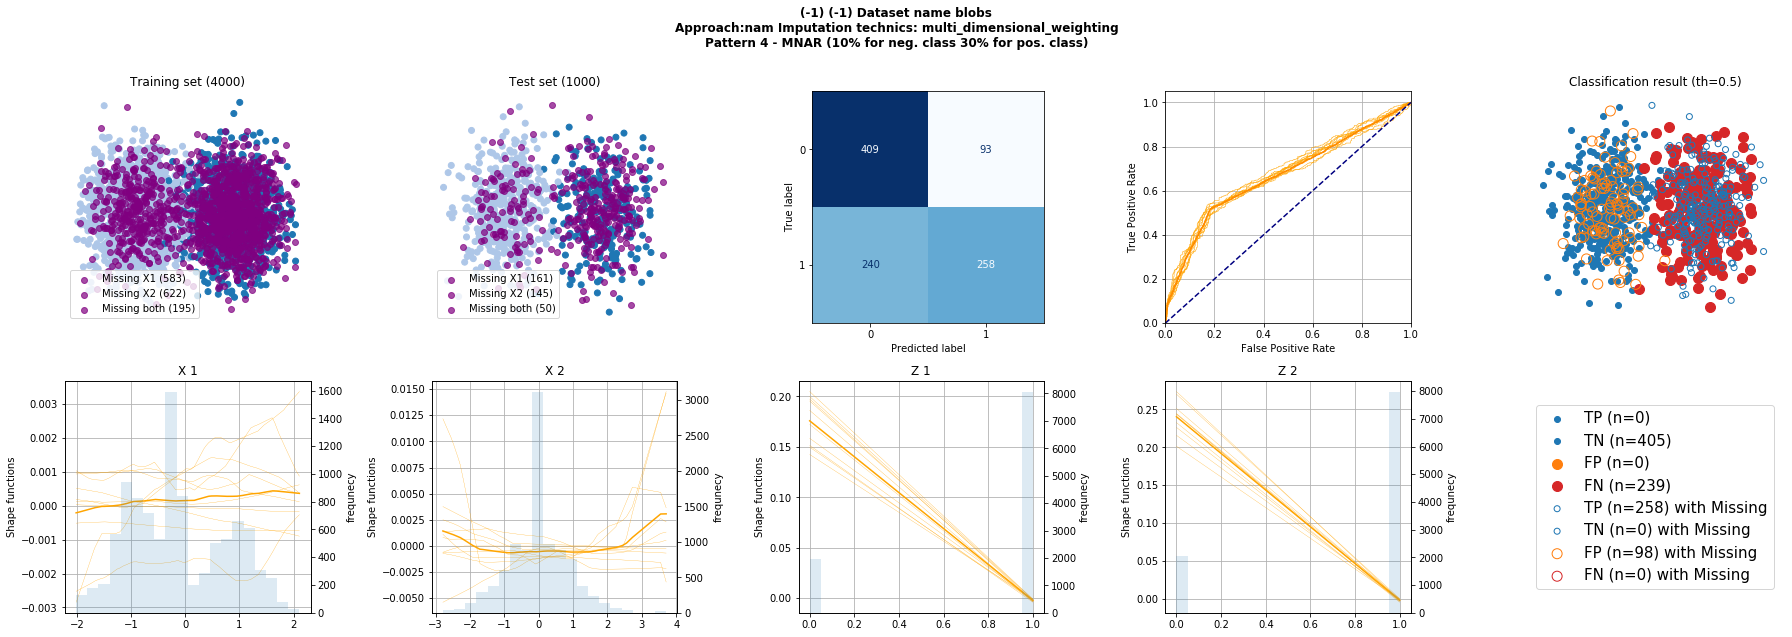

In [7]:
approach = 'nam'
missing_data_handling='encoding'
imputation_method='without'
use_missing_indicator_variables = True

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset=dataset, 
                  purpose='classification', 
                  approach = approach, 
                  previous_experiment=None, 
                  save_experiment=False, 
                  verbosity=0, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=20, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)


# Estimate the distributions 
exp.fit()

# Estimate the distributions 
exp.predict()

# Plot results
exp.plot()
                        
                

	===== Replicate no. 1 =====

Epoch: 1/20;	 Batch: 1/250;	 Err: 0.703
Epoch: 1/20;	 Batch: 4/250;	 Err: 0.811
Epoch: 1/20;	 Batch: 7/250;	 Err: 0.804
Epoch: 1/20;	 Batch: 10/250;	 Err: 0.827
Epoch: 1/20;	 Batch: 13/250;	 Err: 0.832
Epoch: 1/20;	 Batch: 16/250;	 Err: 0.729
Epoch: 1/20;	 Batch: 19/250;	 Err: 0.753
Epoch: 1/20;	 Batch: 22/250;	 Err: 0.823
Epoch: 1/20;	 Batch: 25/250;	 Err: 0.741
Epoch: 1/20;	 Batch: 28/250;	 Err: 0.767
Epoch: 1/20;	 Batch: 31/250;	 Err: 0.707
Epoch: 1/20;	 Batch: 34/250;	 Err: 0.708
Epoch: 1/20;	 Batch: 37/250;	 Err: 0.717
Epoch: 1/20;	 Batch: 40/250;	 Err: 0.721
Epoch: 1/20;	 Batch: 43/250;	 Err: 0.779
Epoch: 1/20;	 Batch: 46/250;	 Err: 0.739
Epoch: 1/20;	 Batch: 49/250;	 Err: 0.734
Epoch: 1/20;	 Batch: 52/250;	 Err: 0.731
Epoch: 1/20;	 Batch: 55/250;	 Err: 0.790
Epoch: 1/20;	 Batch: 58/250;	 Err: 0.792
Epoch: 1/20;	 Batch: 61/250;	 Err: 0.765
Epoch: 1/20;	 Batch: 64/250;	 Err: 0.700
Epoch: 1/20;	 Batch: 67/250;	 Err: 0.757
Epoch: 1/20;	 Batch: 70/250;	 

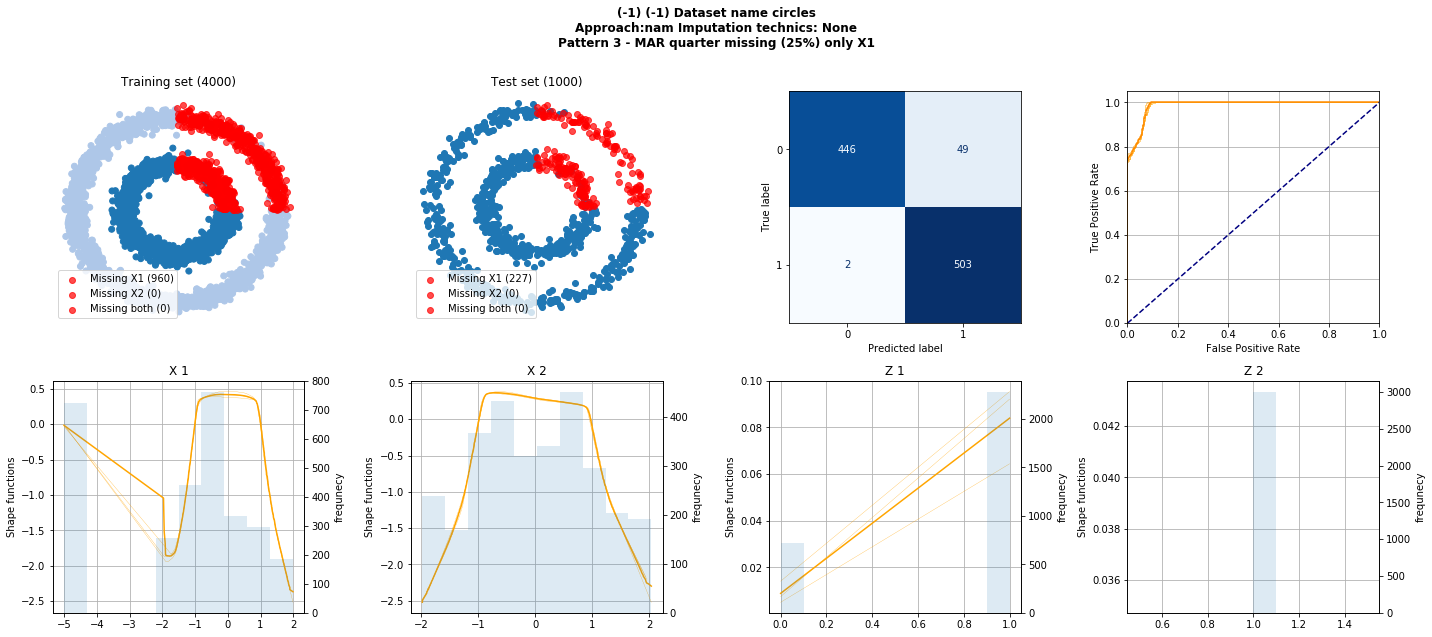

In [5]:
approach = 'nam'
missing_data_handling='encoding'
imputation_method=None
use_missing_indicator_variables = True

# Change dataset missing data handling
dataset.change_imputation_approach(missing_data_handling=missing_data_handling, imputation_method=imputation_method)

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset=dataset, 
                  purpose='classification', 
                  approach = approach, 
                  previous_experiment=None, 
                  save_experiment=False, 
                  verbosity=3, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)


# Estimate the distributions 
exp.fit(use_missing_indicator_variables=use_missing_indicator_variables)

# Estimate the distributions 
exp.predict()

# Plot results
exp.plot()

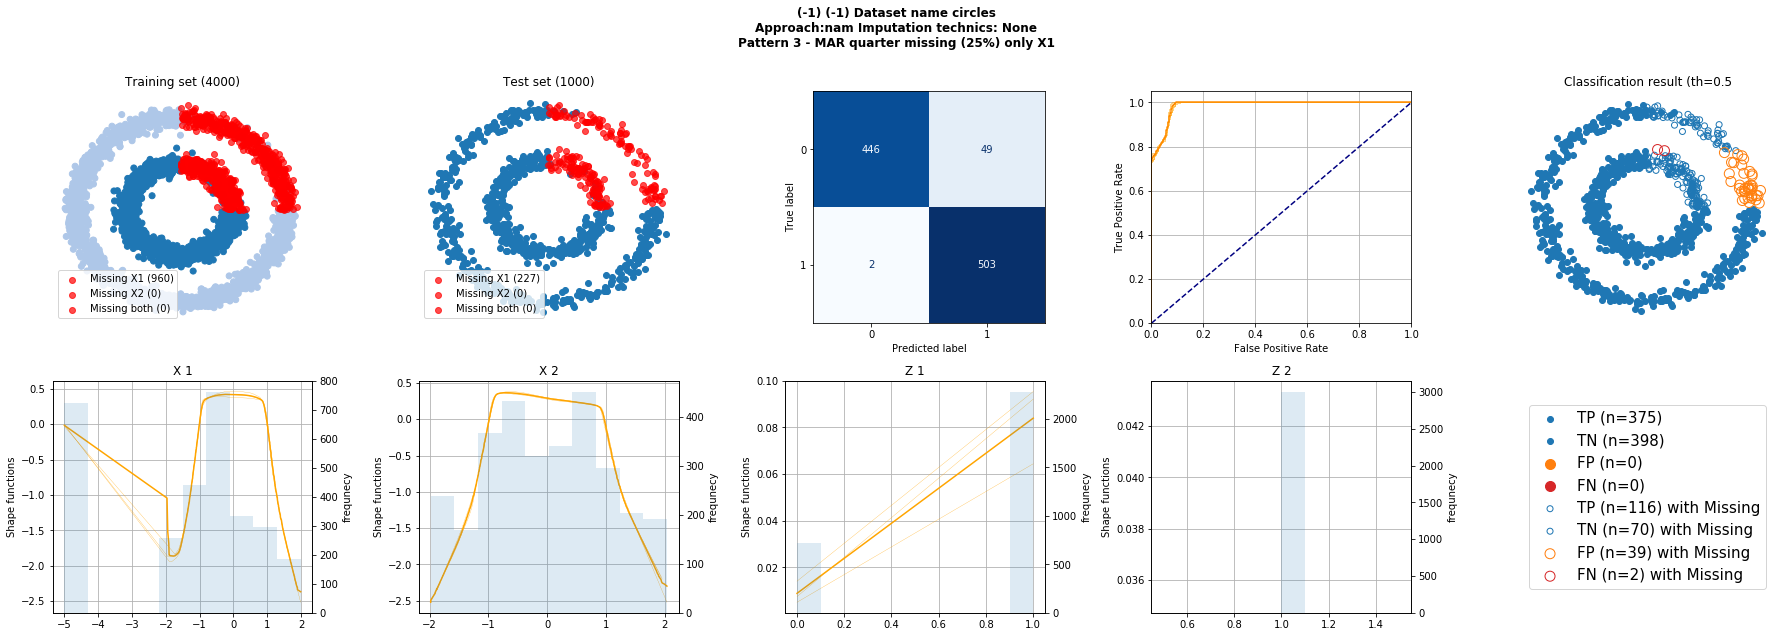

In [39]:
exp.plot()

#### Quantitative results

Loading experiment 227
This experiemnt did not have the best model saved at that time, sorry! Re-do experiment.
Experiment 227 loaded successfully! :-)


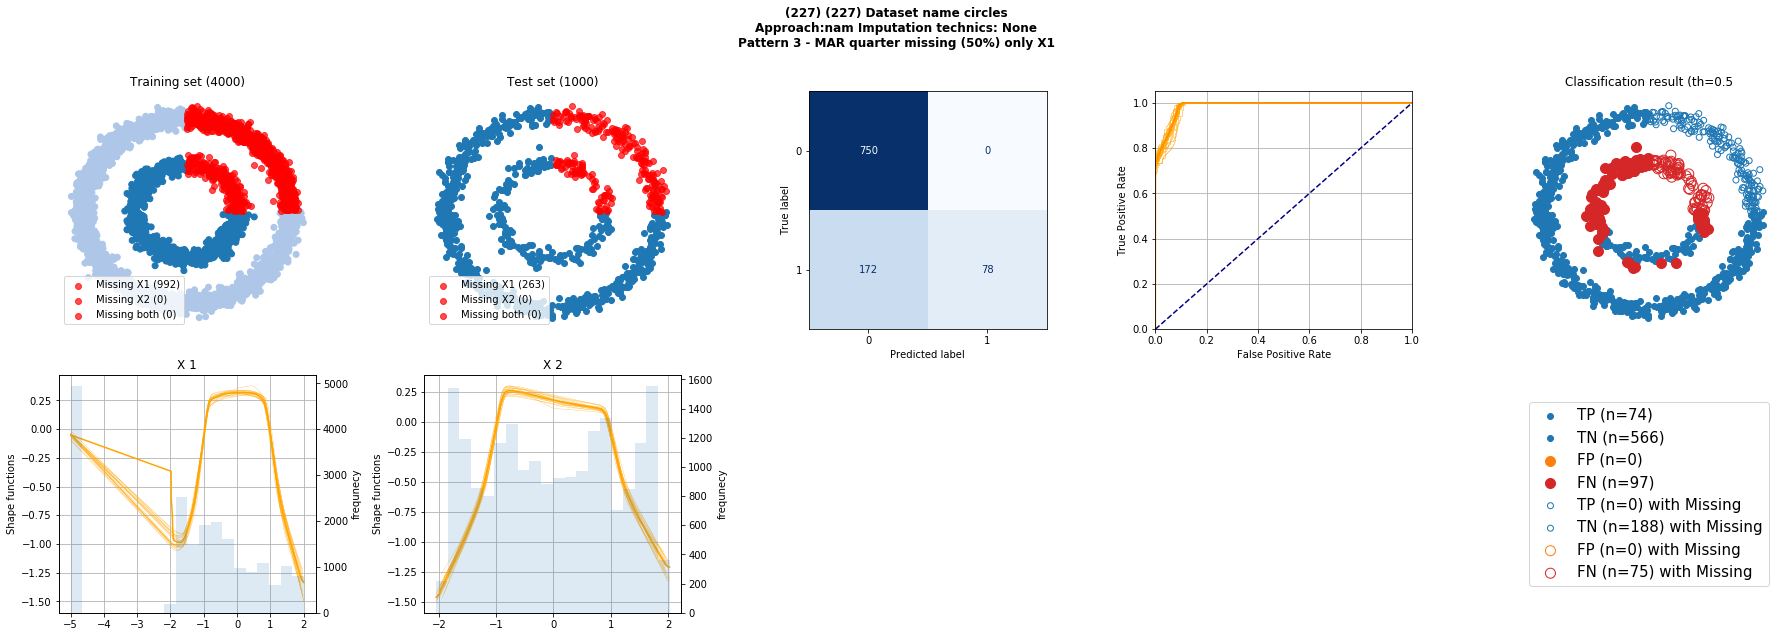

In [126]:
dataset_name= 'circles'
random_experiment = df.query(" `dataset_name` == @dataset_name &`approach` == 'nam'")['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset=dataset, 
                  purpose='classification', 
                  approach = 'nam', 
                  previous_experiment=random_experiment, 
                  save_experiment=False, 
                  verbosity=3, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

exp.predict()
# Plot results
exp.plot()

Loading experiment 214
This experiemnt did not have the best model saved at that time, sorry! Re-do experiment.
Experiment 214 loaded successfully! :-)


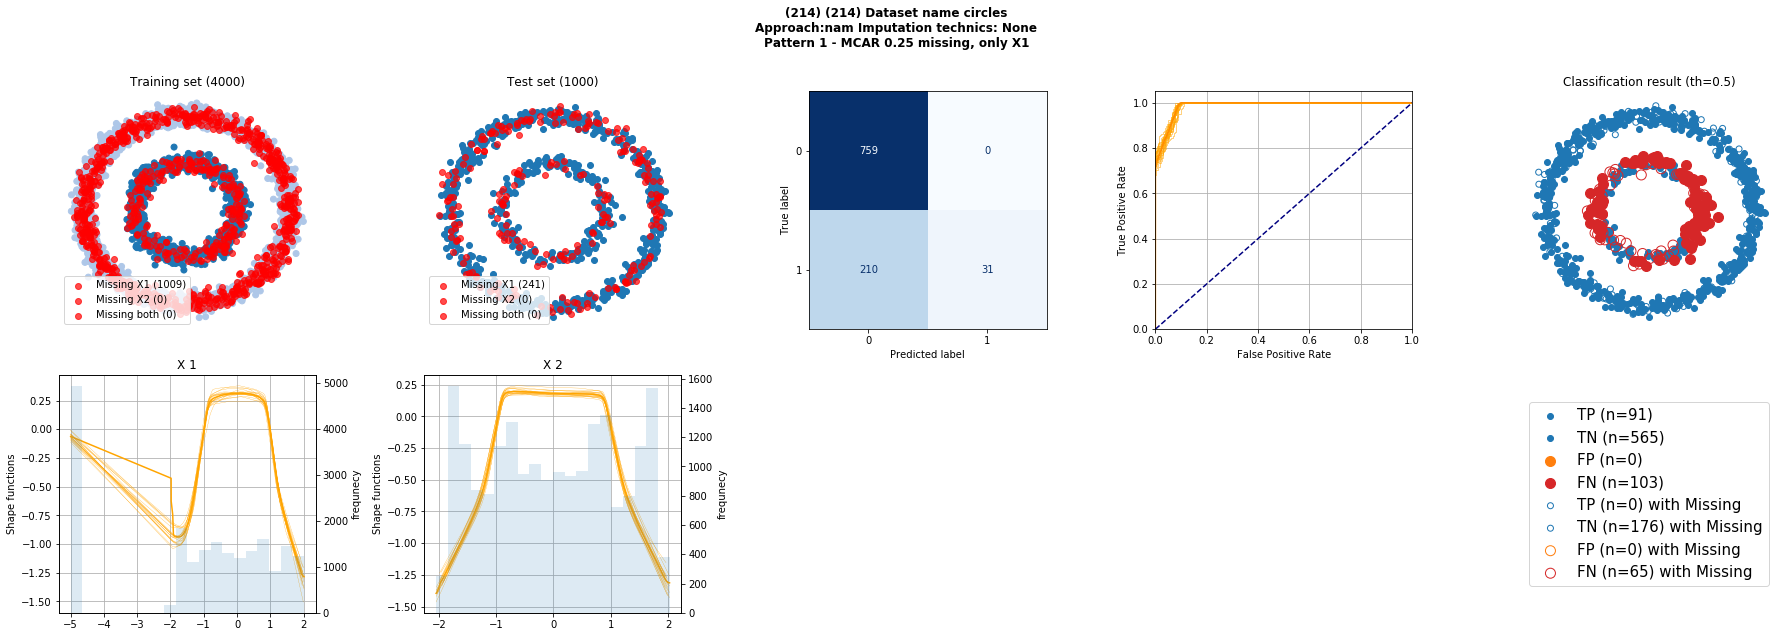

In [128]:
dataset_name= 'circles'
random_experiment = df.query(" `dataset_name` == @dataset_name &`approach` == 'nam'")['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset=dataset, 
                  purpose='classification', 
                  approach = 'nam', 
                  previous_experiment=random_experiment, 
                  save_experiment=False, 
                  verbosity=3, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

exp.predict()
# Plot results
exp.plot()

Loading experiment 51
This experiemnt did not have the best model saved at that time, sorry! Re-do experiment.
Experiment 51 loaded successfully! :-)


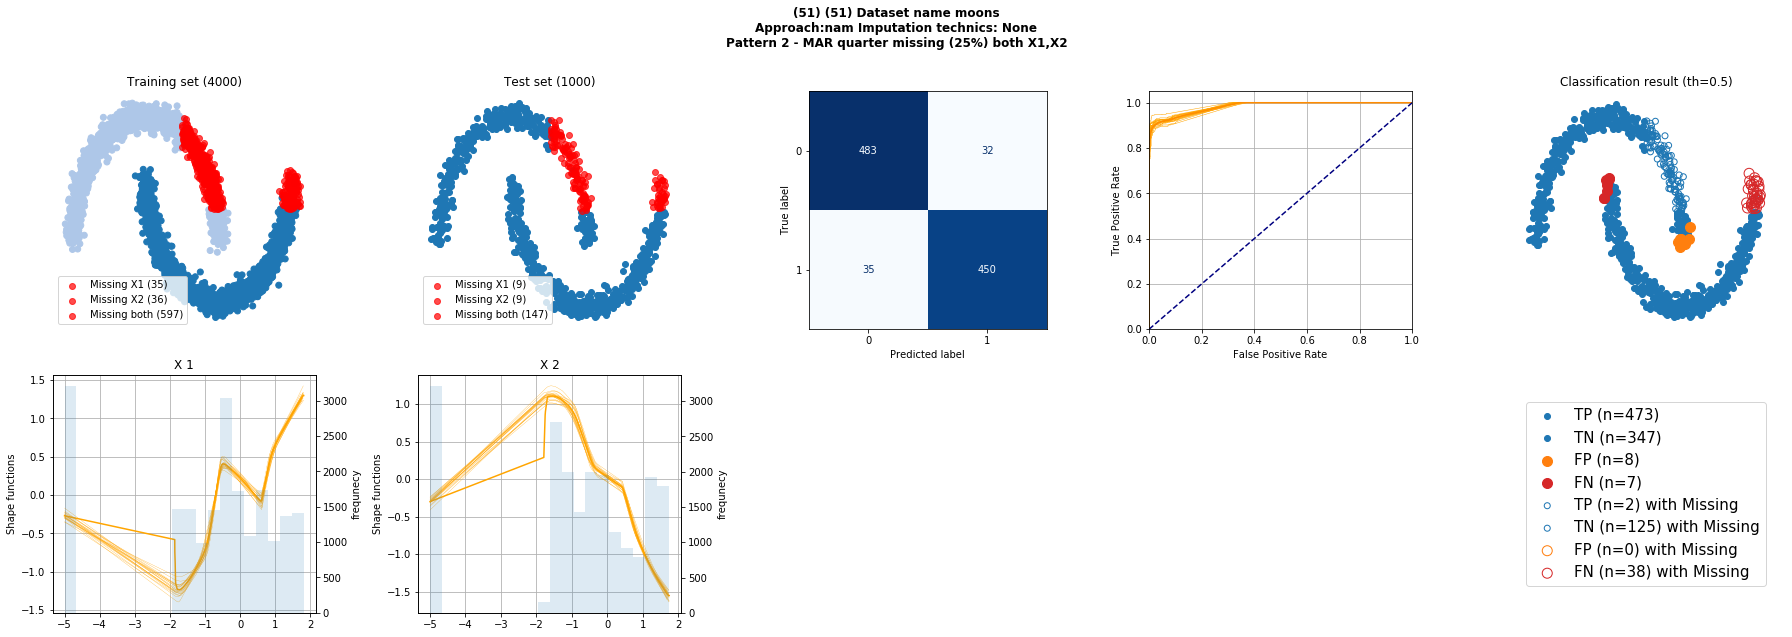

In [129]:
dataset_name= 'moons'
random_experiment = df.query(" `dataset_name` == @dataset_name &`approach` == 'nam'")['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset=dataset, 
                  purpose='classification', 
                  approach = 'nam', 
                  previous_experiment=random_experiment, 
                  save_experiment=False, 
                  verbosity=3, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

exp.predict()
# Plot results
exp.plot()

Loading experiment 30
This experiemnt did not have the best model saved at that time, sorry! Re-do experiment.
Experiment 30 loaded successfully! :-)


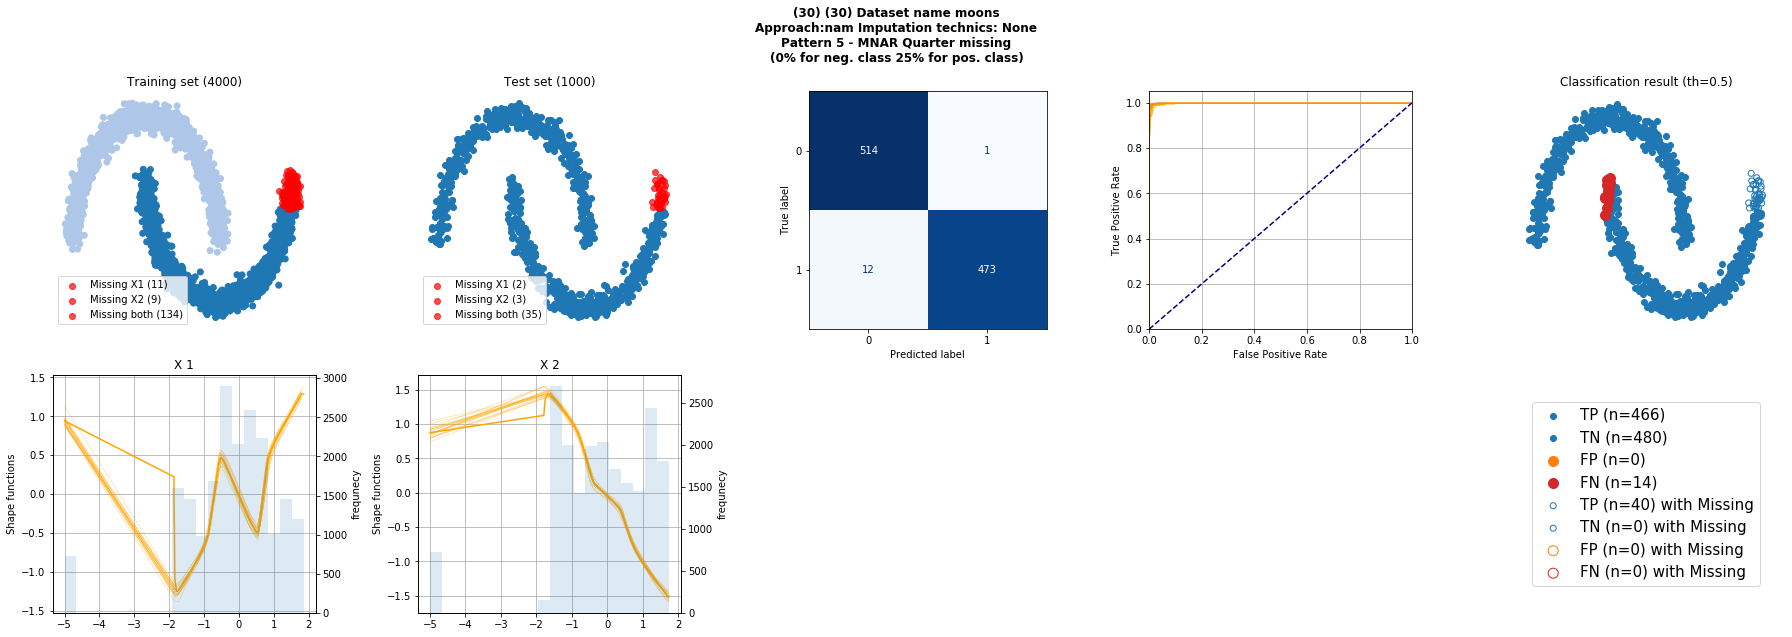

In [130]:
dataset_name= 'moons'
random_experiment = df.query(" `dataset_name` == @dataset_name &`approach` == 'nam'")['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset=dataset, 
                  purpose='classification', 
                  approach = 'nam', 
                  previous_experiment=random_experiment, 
                  save_experiment=False, 
                  verbosity=3, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)`

exp.predict()
# Plot results
exp.plot()

Loading experiment 33
This experiemnt did not have the best model saved at that time, sorry! Re-do experiment.
Experiment 33 loaded successfully! :-)


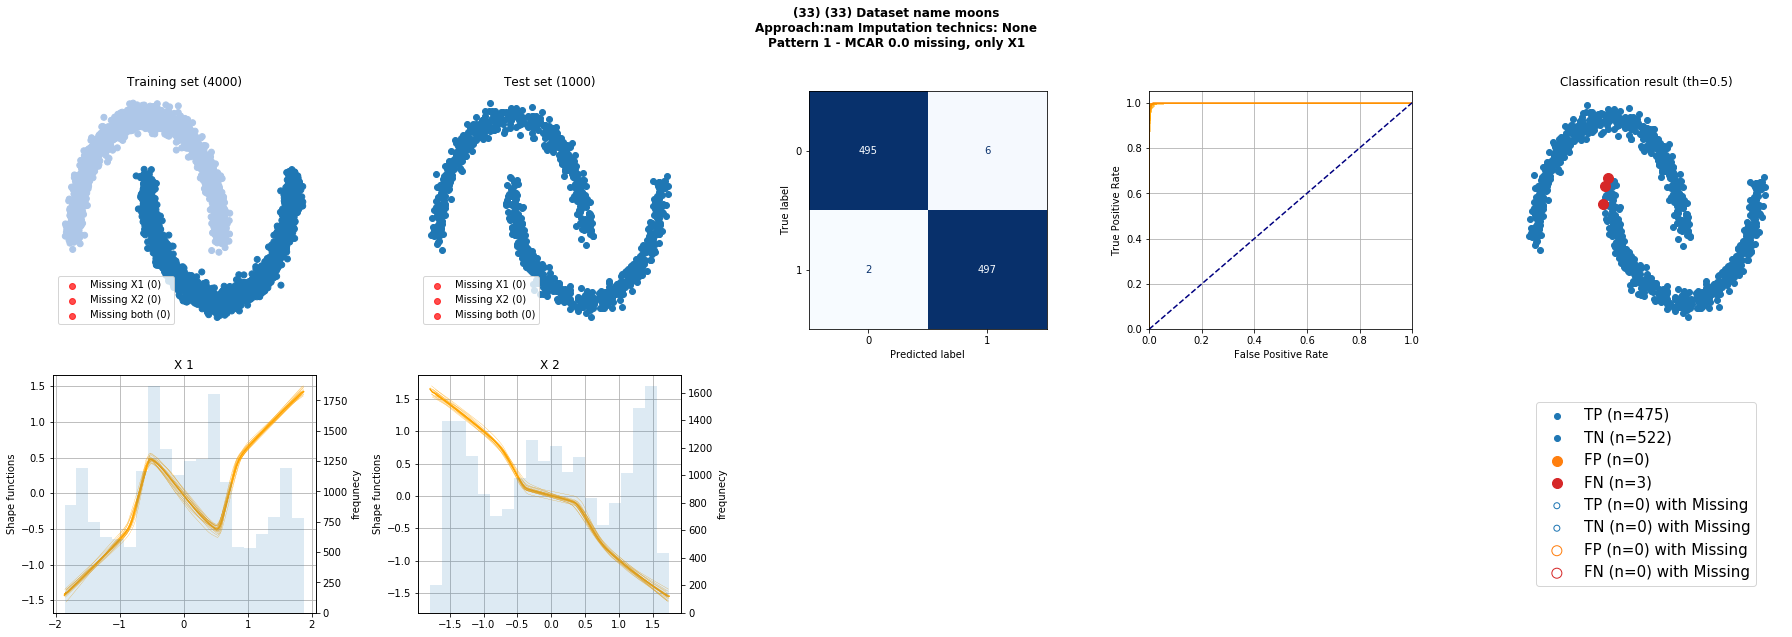

In [132]:
dataset_name= 'moons'
random_experiment = df.query(" `dataset_name` == @dataset_name &`approach` == 'nam'")['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset=dataset, 
                  purpose='classification', 
                  approach = 'nam', 
                  previous_experiment=random_experiment, 
                  save_experiment=False, 
                  verbosity=3, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

exp.predict()
# Plot results
exp.plot()

# Results 1 : In the multi-distributions approach, how is the influence of the class imbalance and missing ratio

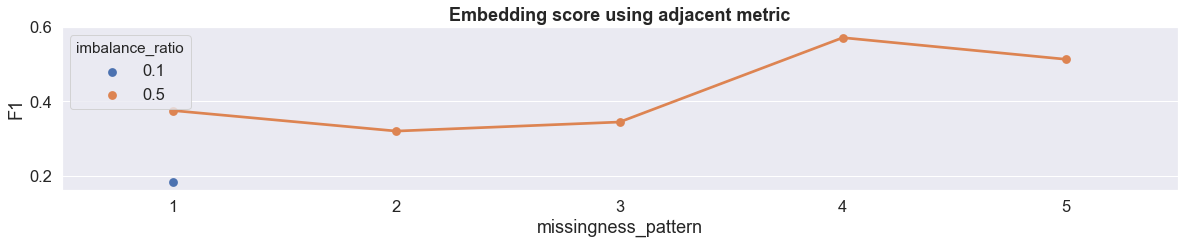

In [58]:
df = df_pruned[df_pruned['approach']=='multi_distributions']

    
plt.figure(figsize=(20, 3))
sns.pointplot(data=df, x="missingness_pattern", order=[1, 2, 3, 4, 5], y="F1", hue='imbalance_ratio', ci=False)
_ = plt.title("Embedding score using adjacent metric", weight='bold')


# Result 2: comparison between approaches on the three dataset for different level of CI and MR 

In [95]:
# Create the experiments
exp = Experiments('circles', 
                  dataset=None, 
                  purpose='classification', 
                  previous_experiment=337, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

Experiment 337 loaded successfully! :-)


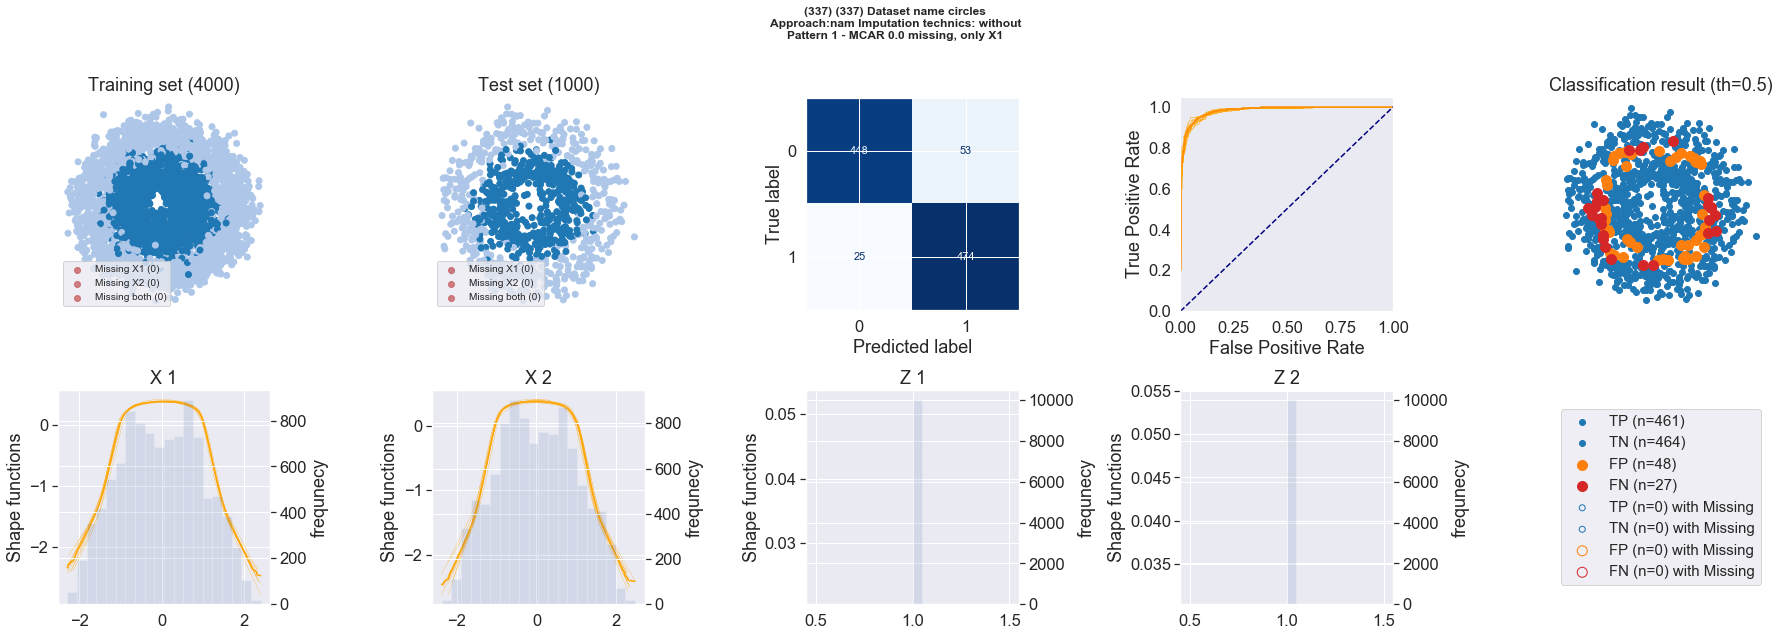

In [97]:
# Plot results
exp.plot()

In [86]:
for _, df in df_pruned[df_pruned['missingness_pattern'].isin([3])].groupby('dataset_name'):
    display(df)

dataset_name  experiment_number             approach missing_data_handling imputation_method use_missing_indicator_variables num_samples  imbalance_ratio  missingness_pattern missingness_mechanism ratio_of_missing_values missing_X1 missing_X2 missing_first_quarter ratio_missing_per_class_0 ratio_missing_per_class_1     auc  Accuracy      F1     MCC  Sensitivity  Specificity  Precision     PPV     NPV     FNR     FDR     FOR resolution  bandwidth  estimation_time_0  estimation_time_1
51         blobs                 18  single_distribution            imputation              mice                            None        5000             0.10                    3                   MAR                     0.1       True      False                  True                      None                      None     NaN    0.6810  0.1710  0.0210       0.3030       0.7270     0.1200  0.1200  0.8950  0.6970  0.8800  0.1050         20        0.2                NaN                NaN
57         blobs                 16  single_distribution            imputation              mice                            None        5000             0.10                    3                   MAR                       0       True      False                  True                      None                      None     NaN    0.6950  0.1260 -0.0090       0.2470       0.7390     0.0850  0.0850  0.9090  0.7530  0.9150  0.0910         20        0.2                NaN                NaN
58         blobs                 42                  nam              encoding           without                            True        5000             0.10                    3                   MAR                       0       True      False                  True                      None                      None  0.9966    0.9873  0.9322  0.9265       0.8941       0.9976     0.9744  0.9744  0.9887  0.1059  0.0256  0.0113         20        0.2                NaN                NaN
59         blobs                 45                  nam              encoding           without                            True        5000             0.10                    3                   MAR                     0.2       True      False                  True                      None                      None  0.9739    0.9708  0.8327  0.8293       0.7219       0.9989     0.9845  0.9845  0.9697  0.2781  0.0155  0.0303         20        0.2                NaN                NaN
64         blobs                 19  single_distribution            imputation              mice                            None        5000             0.10                    3                   MAR                     0.2       True      False                  True                      None                      None     NaN    0.6750  0.1770  0.0370       0.3430       0.7130     0.1190  0.1190  0.9050  0.6570  0.8810  0.0950         20        0.2                NaN                NaN
67         blobs                 21  single_distribution            imputation              mice                            None        5000             0.10                    3                   MAR                     0.3       True      False                  True                      None                      None     NaN    0.6600  0.1710  0.0100       0.3100       0.7050     0.1180  0.1180  0.8890  0.6900  0.8820  0.1110         20        0.2                NaN                NaN
68         blobs                 44                  nam              encoding           without                            True        5000             0.10                    3                   MAR                     0.1       True      False                  True                      None                      None  0.9900    0.9809  0.8969  0.8912       0.8259       0.9986     0.9839  0.9839  0.9807  0.1741  0.0161  0.0193         20        0.2                NaN                NaN
74         blobs                 46                  nam            

dataset_name  experiment_number approach missing_data_handling imputation_method use_missing_indicator_variables num_samples  imbalance_ratio  missingness_pattern missingness_mechanism ratio_of_missing_values missing_X1 missing_X2 missing_first_quarter ratio_missing_per_class_0 ratio_missing_per_class_1     auc  Accuracy      F1     MCC  Sensitivity  Specificity  Precision     PPV     NPV     FNR     FDR     FOR resolution  bandwidth  estimation_time_0  estimation_time_1
6        circles                 27      nam              encoding           without                            True        5000             0.10                    3                   MAR                     0.2       True      False                  True                      None                      None  0.9636    0.8985  0.0000     NaN       0.0000       1.0000        NaN     NaN  0.8985  1.0000     NaN  0.1015         20        0.2                NaN                NaN
7        circles                  9      nam              encoding           without                            True        5000             0.10                    3                   MAR                       0       True      False                  True                      None                      None  0.9859    0.9010  0.0000     NaN       0.0000       1.0000        NaN     NaN  0.9010  1.0000     NaN  0.0990         20        0.2                NaN                NaN
12       circles                 42      nam              encoding           without                            True        5000             0.25                    3                   MAR                     0.1       True      False                  True                      None                      None  0.9768    0.7494  0.0000     NaN       0.0000       1.0000        NaN     NaN  0.7494  1.0000     NaN  0.2506         20        0.2                NaN                NaN
14       circles                 28      nam              encoding           without                            True        5000             0.10                    3                   MAR                     0.3       True      False                  True                      None                      None  0.9480    0.9031  0.0000     NaN       0.0000       1.0000        NaN     NaN  0.9031  1.0000     NaN  0.0969         20        0.2                NaN                NaN
17       circles                 10      nam              encoding           without                            True        5000             0.10                    3                   MAR                     0.1       True      False                  True                      None                      None  0.9771    0.9024  0.0000     NaN       0.0000       1.0000        NaN     NaN  0.9024  1.0000     NaN  0.0976         20        0.2                NaN                NaN
22       circles                 44      nam              encoding           without                            True        5000             0.25                    3                   MAR                     0.3       True      False                  True                      None                      None  0.9530    0.7583  0.0000     NaN       0.0000       1.0000        NaN     NaN  0.7583  1.0000     NaN  0.2417         20        0.2                NaN                NaN
23       circles                 43      nam              encoding           without                            True        5000             0.25                    3                   MAR                     0.2       True      False                  True                      None                      None  0.9673    0.7416  0.0000     NaN       0.0000       1.0000        NaN     NaN  0.7416  1.0000     NaN  0.2584         20        0.2                NaN                NaN
30       circles                 41      nam              encoding           without                            True        5000             0.25                   

dataset_name  experiment_number approach missing_data_handling imputation_method use_missing_indicator_variables num_samples  imbalance_ratio  missingness_pattern missingness_mechanism ratio_of_missing_values missing_X1 missing_X2 missing_first_quarter ratio_missing_per_class_0 ratio_missing_per_class_1     auc  Accuracy      F1     MCC  Sensitivity  Specificity  Precision     PPV     NPV     FNR     FDR     FOR resolution  bandwidth  estimation_time_0  estimation_time_1
85         moons                 59      nam              encoding           without                            True        5000             0.25                    3                   MAR                     0.2       True      False                  True                      None                      None  0.9768    0.9358  0.8539  0.8263       0.7516       0.9973     0.9890  0.9890  0.9235  0.2484  0.0110  0.0765         20        0.2                NaN                NaN
86         moons                 92      nam              encoding           without                            True        5000             0.50                    3                   MAR                     0.3       True      False                  True                      None                      None  0.9710    0.9102  0.9094  0.8203       0.9033       0.9170     0.9156  0.9156  0.9051  0.0967  0.0844  0.0949         20        0.2                NaN                NaN
90         moons                 57      nam              encoding           without                            True        5000             0.25                    3                   MAR                       0       True      False                  True                      None                      None  0.9915    0.9390  0.8653  0.8374       0.7708       0.9966     0.9868  0.9868  0.9271  0.2292  0.0132  0.0729         20        0.2                NaN                NaN
96         moons                 58      nam              encoding           without                            True        5000             0.25                    3                   MAR                     0.1       True      False                  True                      None                      None  0.9829    0.9367  0.8596  0.8313       0.7616       0.9967     0.9874  0.9874  0.9243  0.2384  0.0126  0.0757         20        0.2                NaN                NaN
100        moons                 60      nam              encoding           without                            True        5000             0.25                    3                   MAR                     0.3       True      False                  True                      None                      None  0.9725    0.9362  0.8577  0.8294       0.7588       0.9966     0.9871  0.9871  0.9239  0.2412  0.0129  0.0761         20        0.2                NaN                NaN
105        moons                 27      nam              encoding           without                            True        5000             0.10                    3                   MAR                     0.2       True      False                  True                      None                      None  0.9645    0.9709  0.8253  0.8222       0.7138       0.9986     0.9797  0.9797  0.9702  0.2862  0.0203  0.0298         20        0.2                NaN                NaN
106        moons                  9      nam              encoding           without                            True        5000             0.10                    3                   MAR                       0       True      False                  True                      None                      None  0.9908    0.9718  0.8380  0.8333       0.7340       0.9983     0.9773  0.9773  0.9715  0.2660  0.0227  0.0285         20        0.2                NaN                NaN
112        moons                 89      nam              encoding           without                            True        5000             0.50                   

In [ ]:
for missingness_pattern in [1, 2, 3]:
    
    fig, axes = plt.subplots(3, 3, figsize=(20, 3))
    fig.suptitle("Missingness Pattern: {}".fornat(missingness_pattern))

    for i, imbalance_ratio in enumerate(sorted(df_pruned['imbalance_ratio'].unique(), reverse=True)):

        for j, dataset_name in enumerate(['moons', 'blobs', 'circles']):

            df = df_pruned[(df_pruned['imbalance_ratio']==imbalance_ratio) & (df_pruned['dataset_name']==dataset_name)]

            axes[i][j] = sns.pointplot(data=df, x="ratio_of_missing_values", y="F1", hue='approach', ci=False, ax = axes[i][j])
            axes[i][j].set_ylim([0,1])
            axes[i][j].set_title("{} - Class imbalance: {}".format(dataset_name, imbalance_ratio), weight='bold')

for missingness_pattern in [4,5]:
    
    fig, axes = plt.subplots(3, 3, figsize=(20, 3))
    fig.suptitle("Missingness Pattern: {}".fornat(missingness_pattern))

    for i, imbalance_ratio in enumerate(sorted(df_pruned['imbalance_ratio'].unique(), reverse=True)):

        for j, dataset_name in enumerate(['moons', 'blobs', 'circles']):

            df = df_pruned[(df_pruned['imbalance_ratio']==imbalance_ratio) & (df_pruned['dataset_name']==dataset_name)]

            axes[i][j] = sns.pointplot(data=df, x="ratio_of_missing_values", y="F1", hue='approach', ci=False, ax = axes[i][j])
            axes[i][j].set_ylim([0,1])
            axes[i][j].set_title("{} - Class imbalance: {}".format(dataset_name, imbalance_ratio), weight='bold')


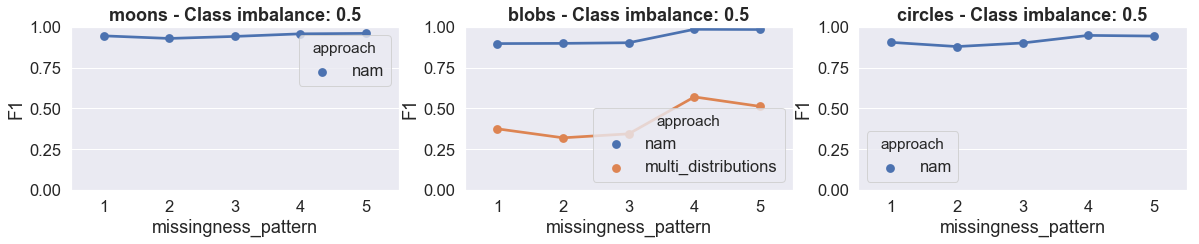

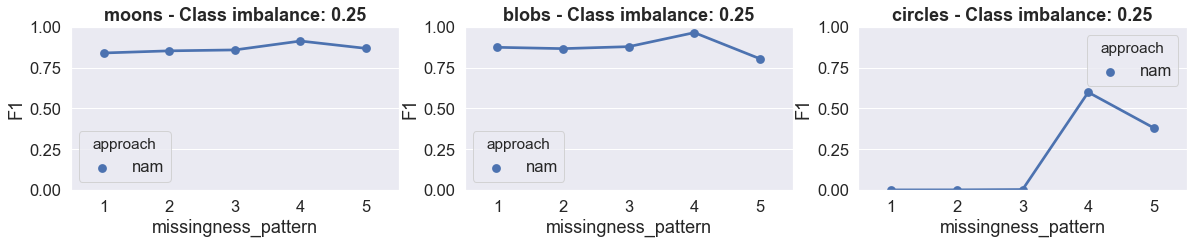

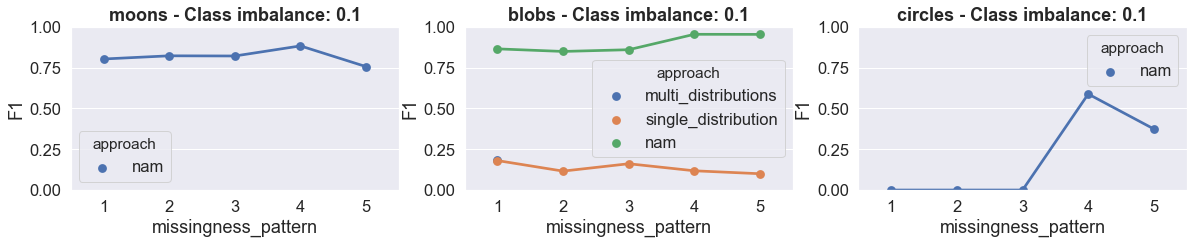

In [53]:
for imbalance_ratio in sorted(df_pruned['imbalance_ratio'].unique(), reverse=True):
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 3));axes = axes.flatten()
    
    for i, dataset_name in enumerate(['moons', 'blobs', 'circles']):
        
        df = df_pruned[(df_pruned['imbalance_ratio']==imbalance_ratio) & (df_pruned['dataset_name']==dataset_name)]
        
        axes[i] = sns.pointplot(data=df, x="missingness_pattern", y="F1", hue='approach', ci=False, ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("{} - Class imbalance: {}".format(dataset_name, imbalance_ratio), weight='bold')
        

# Result 3: comparison between imputation technics for the single ditribution approach 

In [64]:
df_pruned

dataset_name  experiment_number             approach missing_data_handling imputation_method use_missing_indicator_variables num_samples  imbalance_ratio  missingness_pattern missingness_mechanism ratio_of_missing_values missing_X1 missing_X2 missing_first_quarter ratio_missing_per_class_0 ratio_missing_per_class_1     auc  Accuracy      F1     MCC  Sensitivity  Specificity  Precision     PPV     NPV     FNR     FDR     FOR resolution  bandwidth  estimation_time_0  estimation_time_1
0        circles                 32                  nam              encoding           without                            True        5000             0.10                    5                  MNAR                    None       True       True                  True                         0                     0.216  0.9870    0.9258  0.3744  0.4613       0.2308       1.0000     1.0000  1.0000  0.9239  0.7692  0.0000  0.0761         20        0.2                NaN                NaN
1        circles                 35                  nam              encoding           without                            True        5000             0.25                    1                  MCAR                     0.2       True      False                  None                      None                      None  0.9663    0.7494  0.0000     NaN       0.0000       1.0000        NaN     NaN  0.7494  1.0000     NaN  0.2506         20        0.2                NaN                NaN
2        circles                 34                  nam              encoding           without                            True        5000             0.25                    1                  MCAR                     0.1       True      False                  None                      None                      None  0.9796    0.7459  0.0031     NaN       0.0016       1.0000        NaN     NaN  0.7458  0.9984     NaN  0.2542         20        0.2                NaN                NaN
3        circles                 33                  nam              encoding           without                            True        5000             0.25                    1                  MCAR                       0       True      False                  None                      None                      None  0.9870    0.7466  0.0000     NaN       0.0000       1.0000        NaN     NaN  0.7466  1.0000     NaN  0.2534         20        0.2                NaN                NaN
4        circles                 20                  nam              encoding           without                            True        5000             0.10                    1                  MCAR                     0.3       True      False                  None                      None                      None  0.9422    0.9024  0.0000     NaN       0.0000       1.0000        NaN     NaN  0.9024  1.0000     NaN  0.0976         20        0.2                NaN                NaN
..           ...                ...                  ...                   ...               ...                             ...         ...              ...                  ...                   ...                     ...        ...        ...                   ...                       ...                       ...     ...       ...     ...     ...          ...          ...        ...     ...     ...     ...     ...     ...        ...        ...                ...                ...
356        blobs                 63                  nam              encoding           without                            True        5000             0.25                    4                  MNAR                    None       True       True                 False                         0                      0.25  0.9985    0.9833  0.9652  0.9547       0.9429       0.9964     0.9888  0.9888  0.9818  0.0571  0.0112  0.0182         20        0.2                NaN                NaN
363        blobs                115  multi_distributions            

In [68]:
df_pruned[(df_pruned['approach']=='single_distribution')]# & (df_pruned['imbalance_ratio']==imbalance_ratio) & (df_pruned['dataset_name']==dataset_name)]

dataset_name  experiment_number             approach missing_data_handling imputation_method use_missing_indicator_variables num_samples  imbalance_ratio  missingness_pattern missingness_mechanism ratio_of_missing_values missing_X1 missing_X2 missing_first_quarter ratio_missing_per_class_0 ratio_missing_per_class_1  auc  Accuracy     F1    MCC  Sensitivity  Specificity  Precision    PPV    NPV    FNR    FDR    FOR resolution  bandwidth  estimation_time_0  estimation_time_1
47        blobs                 50  single_distribution            imputation              mice                            None        5000              0.1                    4                  MNAR                    None       True       True                 False                         0                      0.25  NaN     0.701  0.118 -0.035        0.190        0.761      0.085  0.085  0.889  0.810  0.915  0.111         20        0.2                NaN                NaN
49        blobs                 34  single_distribution            imputation               knn                            None        5000              0.1                    1                  MCAR                       0       True      False                  None                      None                      None  NaN     0.695  0.126 -0.009        0.247        0.739      0.085  0.085  0.909  0.753  0.915  0.091         20        0.2                NaN                NaN
51        blobs                 18  single_distribution            imputation              mice                            None        5000              0.1                    3                   MAR                     0.1       True      False                  True                      None                      None  NaN     0.681  0.171  0.021        0.303        0.727      0.120  0.120  0.895  0.697  0.880  0.105         20        0.2                NaN                NaN
54        blobs                 11  single_distribution            imputation              mice                            None        5000              0.1                    2                   MAR                     0.1       True       True                  True                      None                      None  NaN     0.707  0.093 -0.055        0.156        0.765      0.066  0.066  0.895  0.844  0.934  0.105         20        0.2                NaN                NaN
55        blobs                  7  single_distribution            imputation              mice                            None        5000              0.1                    1                  MCAR                     0.2       True      False                  None                      None                      None  NaN     0.693  0.163  0.007        0.261        0.749      0.119  0.119  0.886  0.739  0.881  0.114         20        0.2                NaN                NaN
56        blobs                 29  single_distribution            imputation              mice                            None        5000              0.1                    5                  MNAR                    None       True       True                  True                         0                       0.3  NaN     0.659  0.100 -0.069        0.184        0.713      0.069  0.069  0.884  0.816  0.931  0.116         20        0.2                NaN                NaN
57        blobs                 16  single_distribution            imputation              mice                            None        5000              0.1                    3                   MAR                       0       True      False                  True                      None                      None  NaN     0.695  0.126 -0.009        0.247        0.739      0.085  0.085  0.909  0.753  0.915  0.091         20        0.2                NaN                NaN
63        blobs                 10  single_distribution            imputation              mice                            None        5000              0.

0


ValueError: min() arg is an empty sequence

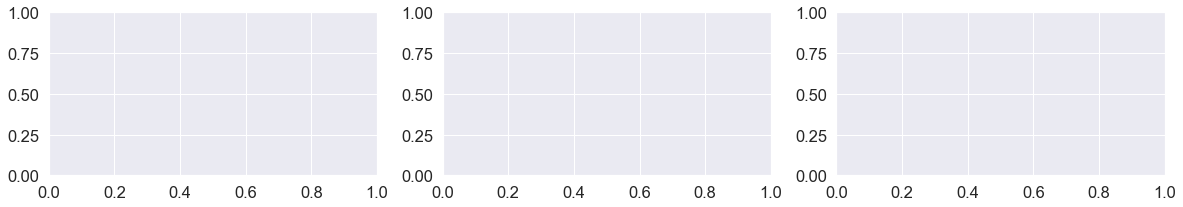

In [67]:
for imbalance_ratio in sorted(df_pruned['imbalance_ratio'].unique(), reverse=True):
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 3));axes = axes.flatten()
    
    for i, dataset_name in enumerate(['moons', 'blobs', 'circles']):
        
        df = df_pruned[(df_pruned['approach']=='single_distribution') & (df_pruned['imbalance_ratio']==imbalance_ratio) & (df_pruned['dataset_name']==dataset_name)]
        print(len(df))
        axes[i] = sns.pointplot(data=df, x="missingness_pattern", y="F1", hue='imputation_method', ci=False, ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("{} - Class imbalance: {}".format(dataset_name, imbalance_ratio), weight='bold')
        

In [ ]:
df = df_pruned[df_pruned['approach']=='multi_distributions']

    
plt.figure(figsize=(25, 8))
sns.pointplot(data=df, x="missingness_pattern", order=[1, 2, 3, 4, 5], y="F1", hue='imbalance_ratio', ci=False)
_ = plt.title("Embedding score using adjacent metric", weight='bold')


In [22]:


df_of_interest = df_pruned.query("`dataset_name` == @dataset_name ")

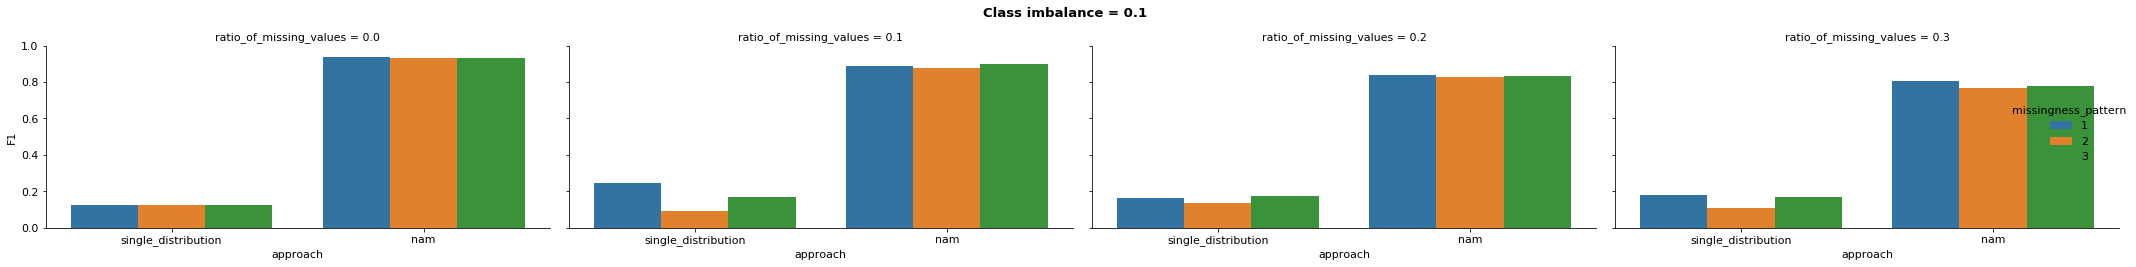

In [23]:


for class_imbalance in df_of_interest['imbalance_ratio'].sort_values().unique():
    g = sns.factorplot("approach", "F1", "missingness_pattern", col="ratio_of_missing_values", data=df_of_interest.query("`missingness_pattern` in [1, 2, 3] & `imbalance_ratio`==@class_imbalance"), kind="bar", ci=False, height=3.5, aspect=2, y=(0,1))
    
    g.fig.suptitle('Class imbalance = {}'.format(class_imbalance), weight='bold', y=1.05)
    for ax in g.axes_dict.values():
        ax.set_ylim([0,1])
    
    plt.tight_layout();plt.show()

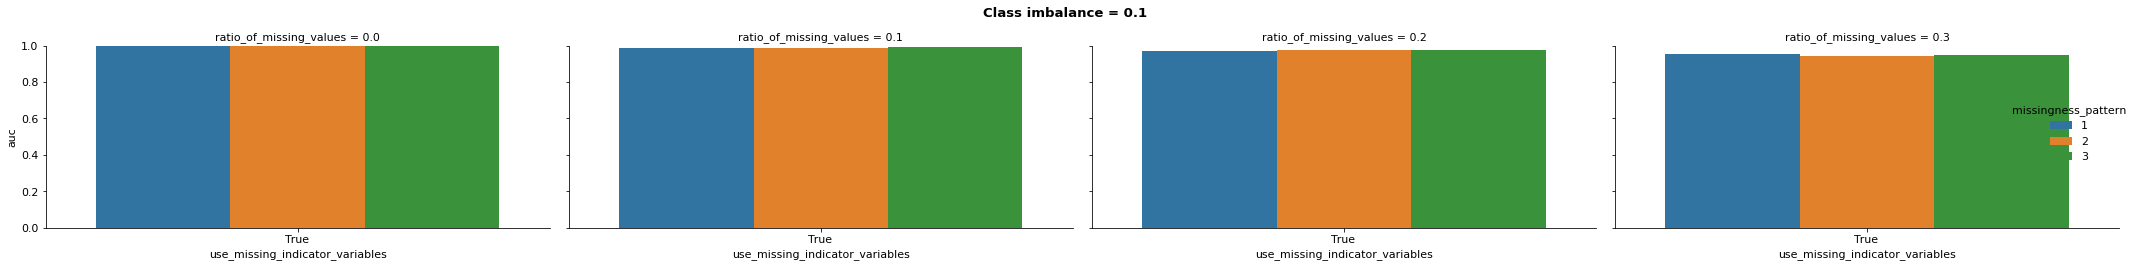

In [26]:
df_of_interest = df_pruned.query("`dataset_name` == @dataset_name  & `approach` == 'nam'")

for class_imbalance in df_of_interest['imbalance_ratio'].sort_values().unique():
    #if class_imbalance==0.1:
    #    continue
    g = sns.factorplot("use_missing_indicator_variables", "auc", "missingness_pattern", col="ratio_of_missing_values", data=df_of_interest.query("`missingness_pattern` in [1, 2, 3] & `imbalance_ratio`==@class_imbalance"), kind="bar", ci=False, height=3.5, aspect=2)
    g.fig.suptitle('Class imbalance = {}'.format(class_imbalance), weight='bold', y=1.05)
    for ax in g.axes_dict.values():
        ax.set_ylim([0,1])
    
    plt.tight_layout();plt.show()

In [229]:
df_of_interest = df_of_interest.query("`ratio_of_missing_values`<0.45")
df_of_interest = df_of_interest.query(" (`approach` == 'single_distribution' &`imputation_method`=='multi_dimensional_weighting') | `approach` != 'single_distribution'")
df_of_interest.ratio_of_missing_values = df_of_interest.ratio_of_missing_values.round(1)
df_of_interest.sort_values(by='approach', inplace=True)

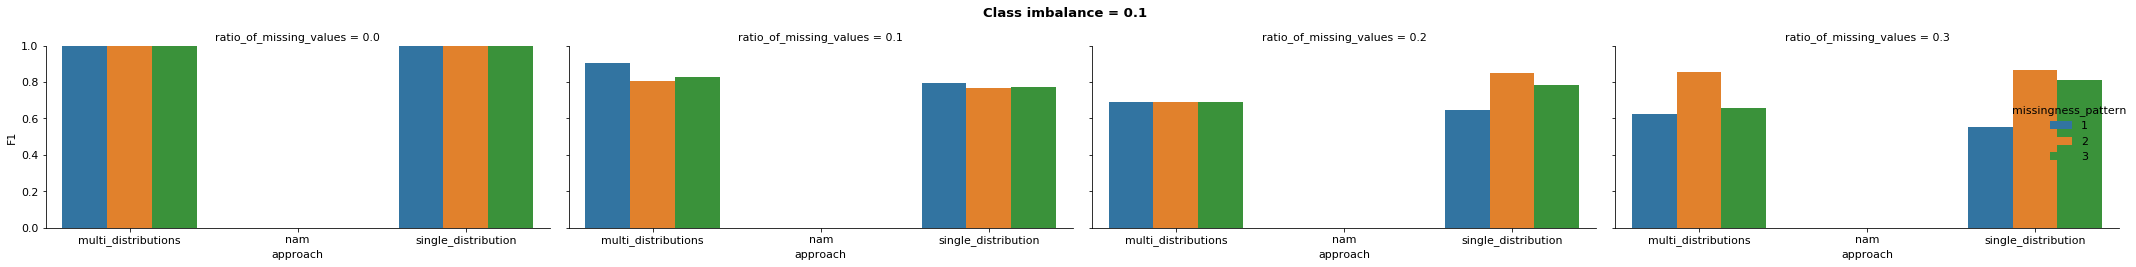

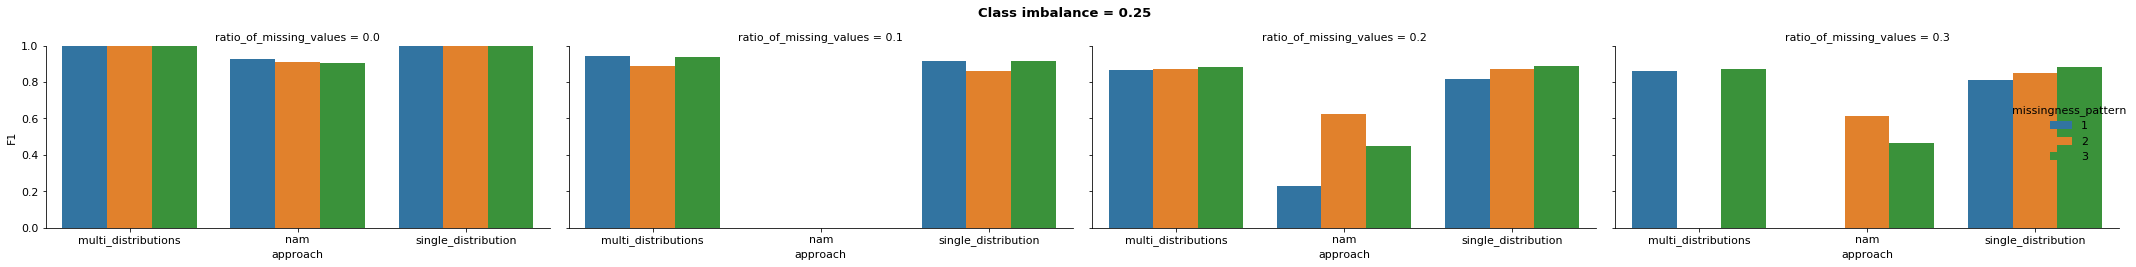

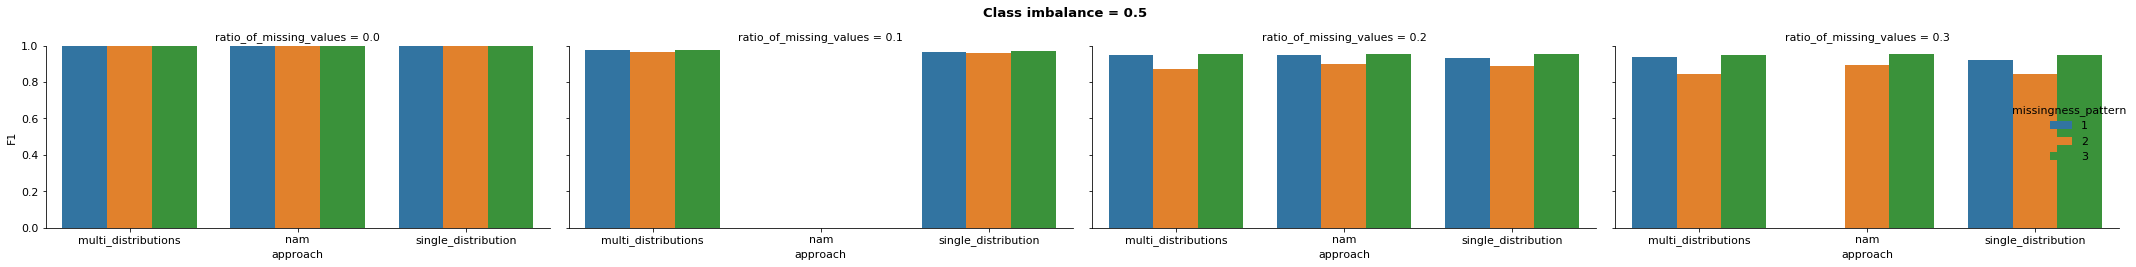

In [231]:


for class_imbalance in df_of_interest['imbalance_ratio'].sort_values().unique():
    if class_imbalance==0.05:
        continue
    g = sns.factorplot("approach", "F1", "missingness_pattern", col="ratio_of_missing_values", data=df_of_interest.query("`missingness_pattern` in [1, 2, 3] & `imbalance_ratio`==@class_imbalance"), kind="bar", ci=False, height=3.5, aspect=2, y=(0,1))
    
    g.fig.suptitle('Class imbalance = {}'.format(class_imbalance), weight='bold', y=1.05)
    for ax in g.axes_dict.values():
        ax.set_ylim([0,1])
    
    plt.tight_layout();plt.show()

In [232]:
df_nam = df.query(" `approach` == 'nam' & `dataset_name` == @dataset_name ").sort_values(by='imputation_method')
df_nam.replace({None:np.nan}, inplace=True)
df_nam = df_nam.query("`ratio_of_missing_values`<0.45")

df_nam.ratio_of_missing_values = df_nam.ratio_of_missing_values.apply(lambda x: 0.24 if 0.24 < x and x < 0.251 else x)
df_nam.ratio_of_missing_values = df_nam.ratio_of_missing_values.round(1)

#df_nam

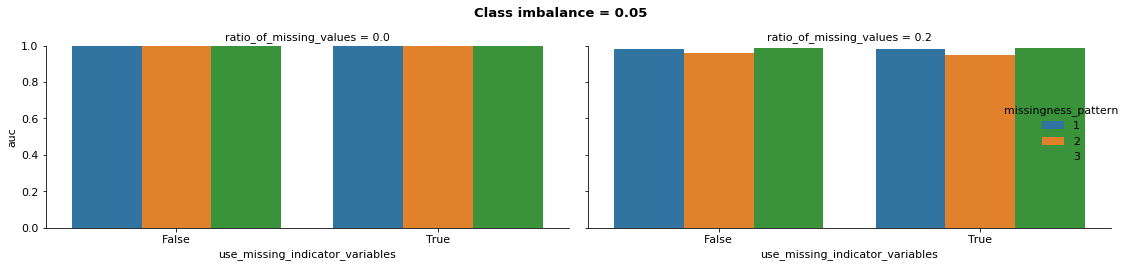

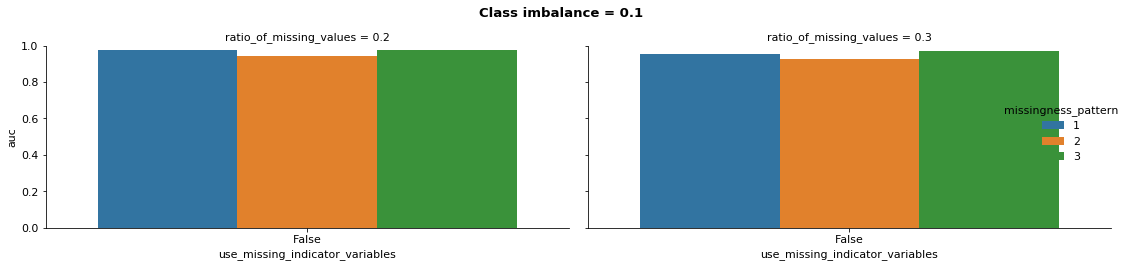

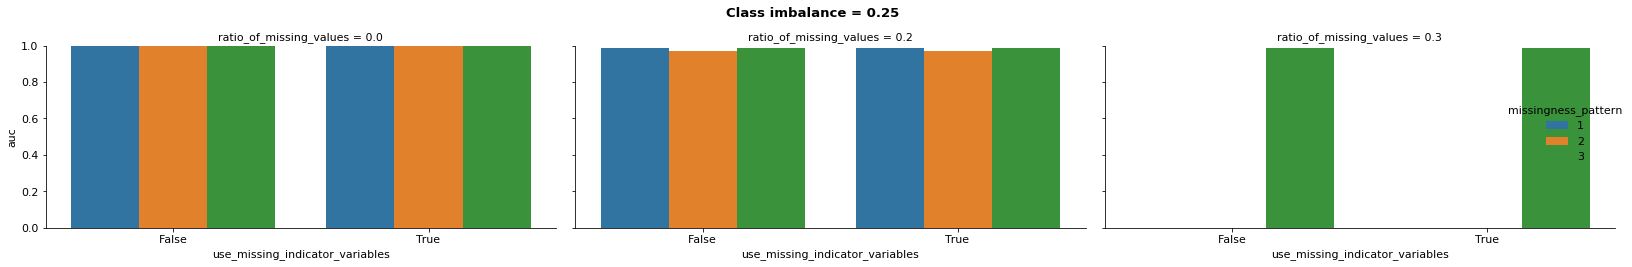

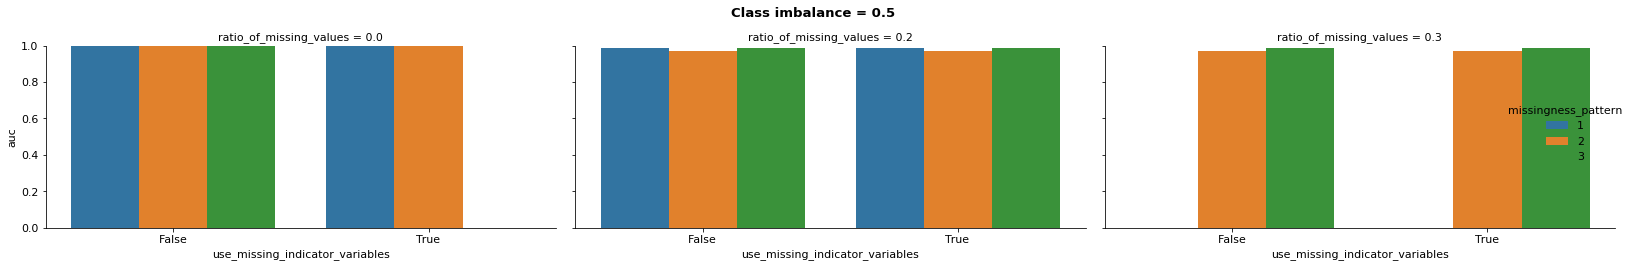

In [234]:
for class_imbalance in df_nam['imbalance_ratio'].sort_values().unique():
    #if class_imbalance==0.1:
    #    continue
    g = sns.factorplot("use_missing_indicator_variables", "auc", "missingness_pattern", col="ratio_of_missing_values", data=df_nam.query("`missingness_pattern` in [1, 2, 3] & `imbalance_ratio`==@class_imbalance"), kind="bar", ci=False, height=3.5, aspect=2)
    g.fig.suptitle('Class imbalance = {}'.format(class_imbalance), weight='bold', y=1.05)
    for ax in g.axes_dict.values():
        ax.set_ylim([0,1])
    
    plt.tight_layout();plt.show()

In [237]:
dataset_name = 'circles'
df_experiement = df.query(" `approach` == 'single_distribution' & `dataset_name` == @dataset_name ").sort_values(by='imputation_method')

df_experiement.replace({"multi_dimensional_weighting":'ours'}, inplace=True)
df_experiement = df_experiement.query("`ratio_of_missing_values`<0.45")

df_experiement.ratio_of_missing_values = df_experiement.ratio_of_missing_values.apply(lambda x: 0.24 if 0.24 < x and x < 0.251 else x)
df_experiement.ratio_of_missing_values = df_experiement.ratio_of_missing_values.round(1)
df_experiement.ratio_missing_per_class_0 = df_experiement.ratio_missing_per_class_0.round(2)
df_experiement.ratio_missing_per_class_1 = df_experiement.ratio_missing_per_class_1.round(2)

df_experiement.drop(index=df_experiement.query(" `ratio_missing_per_class_1` > .5").index, inplace=True)


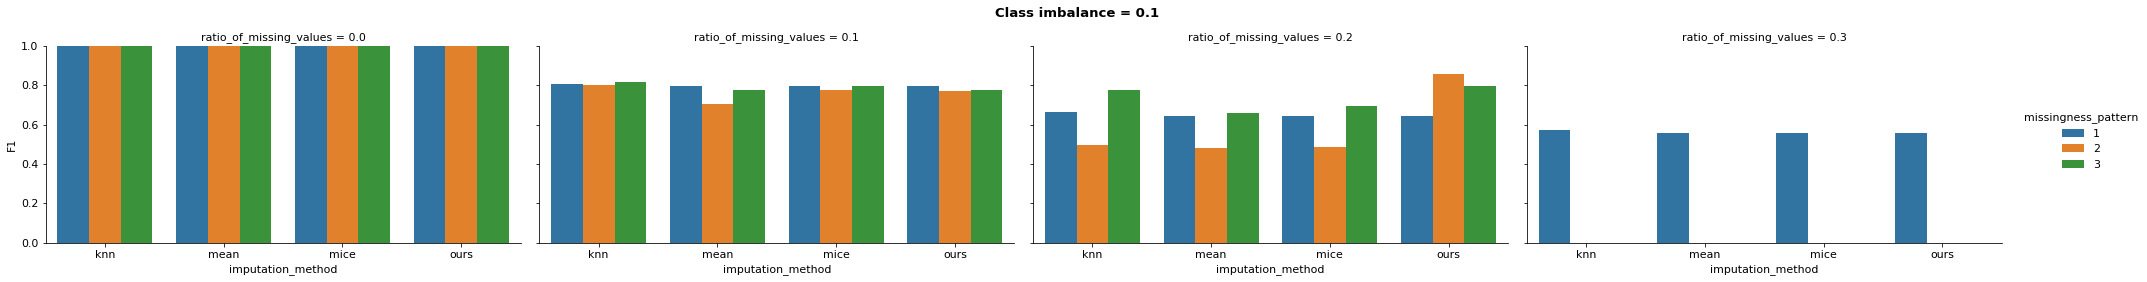

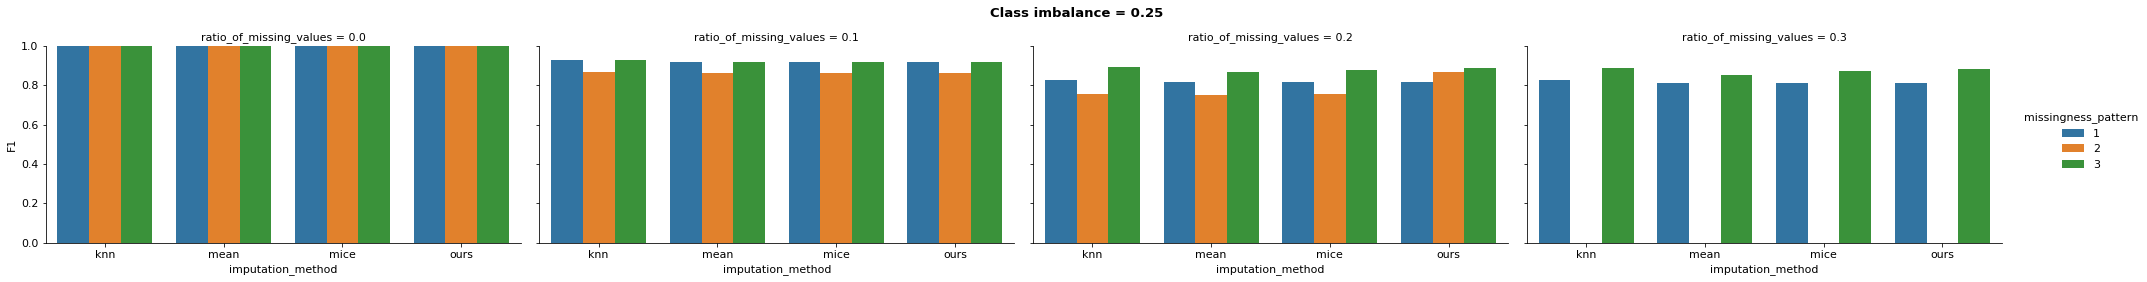

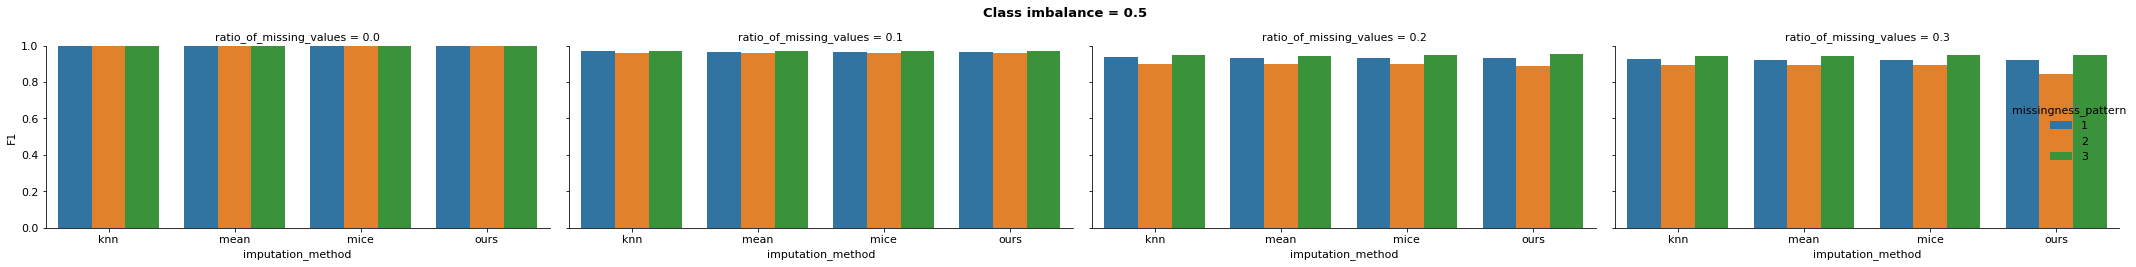

In [239]:
for class_imbalance in df_experiement['imbalance_ratio'].sort_values().unique():
    if class_imbalance==0.05:
        continue
    g = sns.factorplot("imputation_method", "F1", "missingness_pattern", col="ratio_of_missing_values", data=df_experiement.query("`missingness_pattern` in [1, 2, 3] & `imbalance_ratio`==@class_imbalance"), kind="bar", ci=False, height=3.5, aspect=2)
    g.fig.suptitle('Class imbalance = {}'.format(class_imbalance), weight='bold', y=1.05)
    for ax in g.axes_dict.values():
        ax.set_ylim([0,1])
plt.tight_layout()
plt.show()

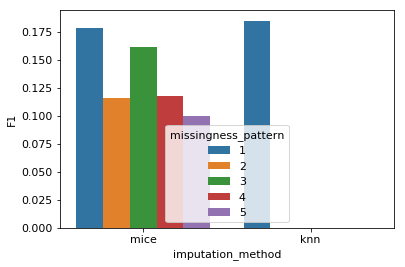

In [32]:
df_of_interest = df_pruned.query("`dataset_name` == @dataset_name  & `approach` == 'single_distribution'")

sns.barplot(data=df_of_interest, x="imputation_method", y="F1", hue='missingness_pattern', ci=False)

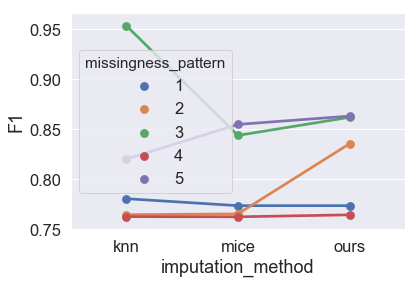

In [ ]:
sns.pointplot(data=df_experiement, x="imputation_method", y="F1", hue='missingness_pattern', ci=False)

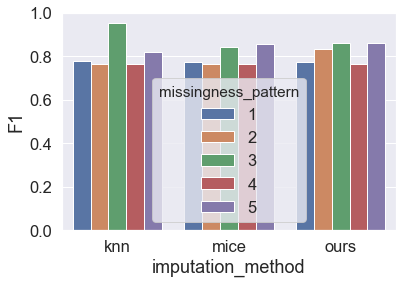

In [ ]:
sns.barplot(data=df_experiement, x="imputation_method", y="F1", hue='missingness_pattern', ci=False)

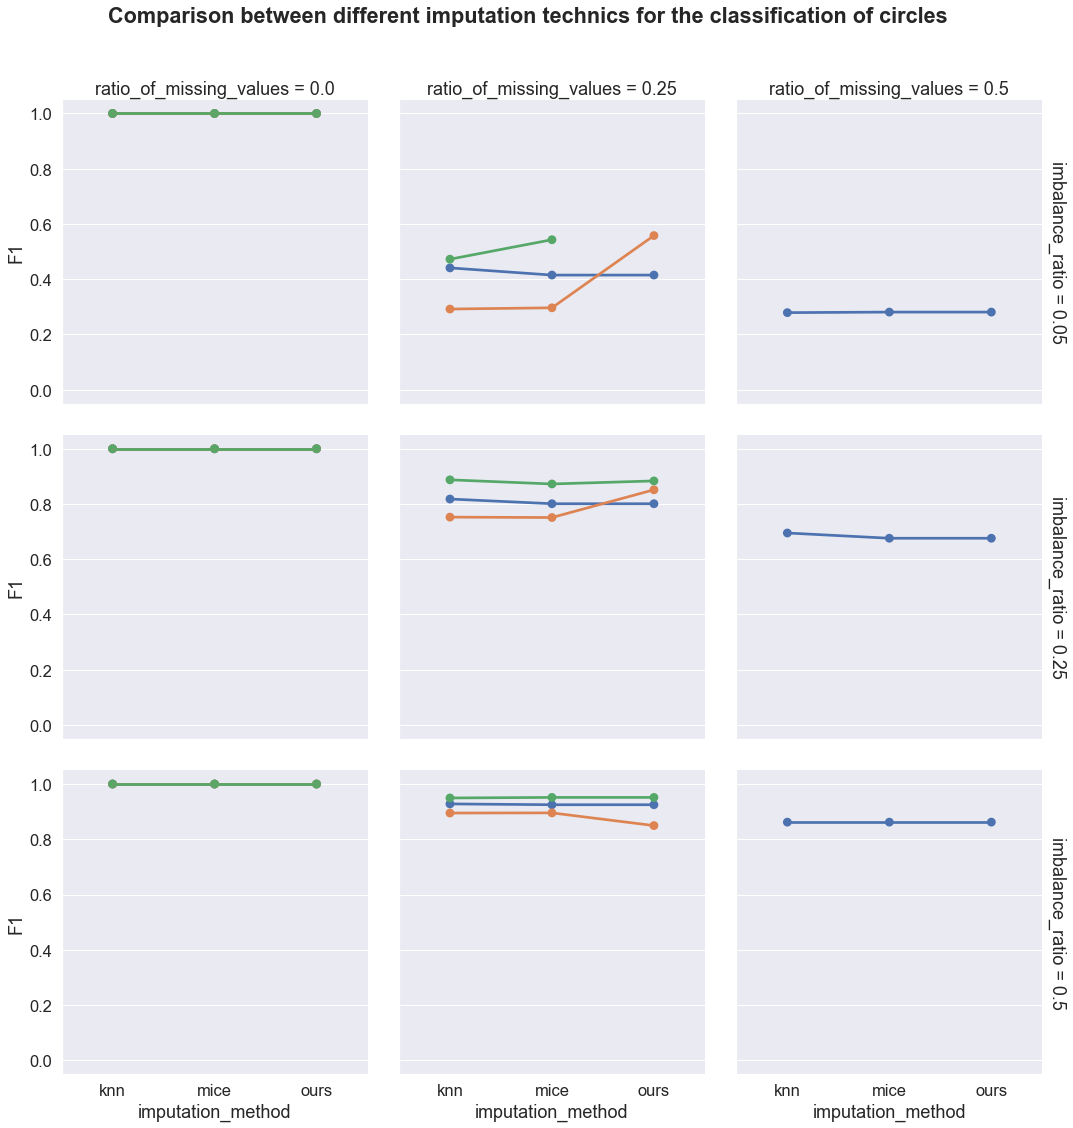

In [204]:
sns.set(font_scale = 1.5)
g = sns.FacetGrid(df_experiement, col="ratio_of_missing_values", row='imbalance_ratio', hue='missingness_pattern', height=5, margin_titles=True, ylim=(-0.05, 1.05))
g.map(sns.pointplot, "imputation_method", "F1",  ci=None)
#for ax in g.axes_dict.values():
#    ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
g.fig.suptitle('Comparison between different imputation technics for the classification of {}'.format(dataset_name), weight='bold', y=1.05)
plt.tight_layout()
plt.show()

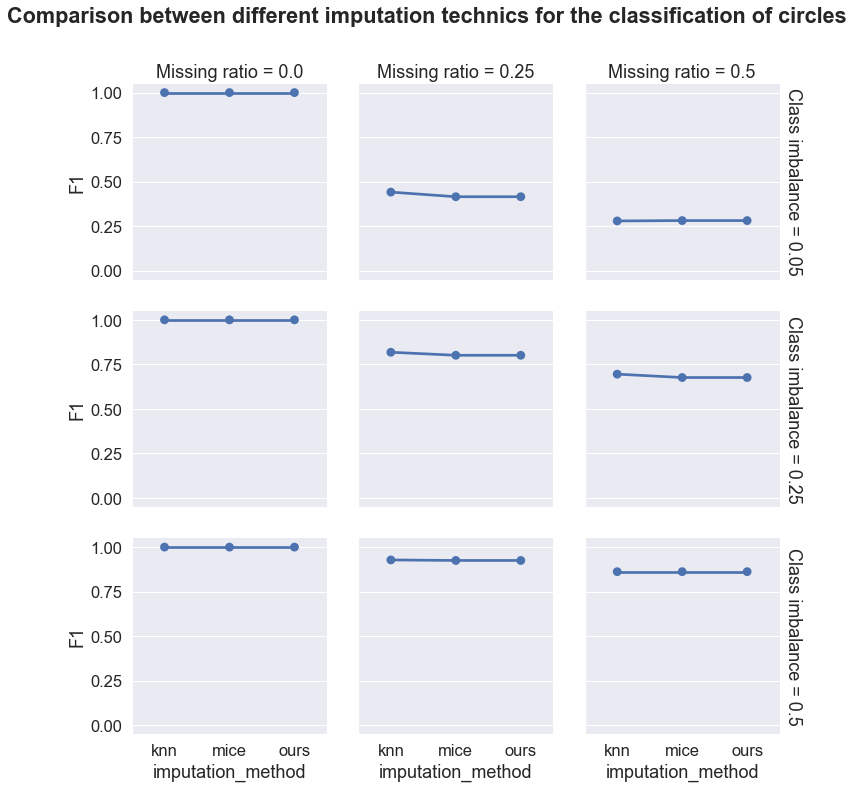

In [152]:
sns.set(font_scale = 1.5)
g = sns.FacetGrid(df_experiement, col="ratio_of_missing_values", row='imbalance_ratio', height=3.5, margin_titles=True, ylim=(-0.05, 1.05))
g.map(sns.pointplot, "imputation_method", "F1", order=['knn', 'mice', 'ours'], ci=None, label='F1')
#for ax in g.axes_dict.values():
#    ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
g.fig.suptitle('Comparison between different imputation technics for the classification of {}'.format(dataset_name), weight='bold', y=1.05)
plt.tight_layout()
plt.show()

In [48]:
df.query( "`dataset_name`==@dataset_name & `missingness_pattern`==@missingness_pattern & `ratio_of_missing_values`==.2")

Empty DataFrame
Columns: [dataset_name, experiment_number, approach, missing_data_handling, imputation_method, use_missing_indicator_variables, num_samples, imbalance_ratio, missingness_pattern, missingness_mechanism, ratio_of_missing_values, missing_X1, missing_X2, missing_first_quarter, ratio_missing_per_class_0, ratio_missing_per_class_1, auc, Accuracy, F1, MCC, Sensitivity, Specificity, Precision, PPV, NPV, FNR, FDR, FOR, resolution, bandwidth, estimation_time_0, estimation_time_1]
Index: []

Text(0.5,1,'Performances when Accuracy evolves\nDataset: moons and MP: 3')

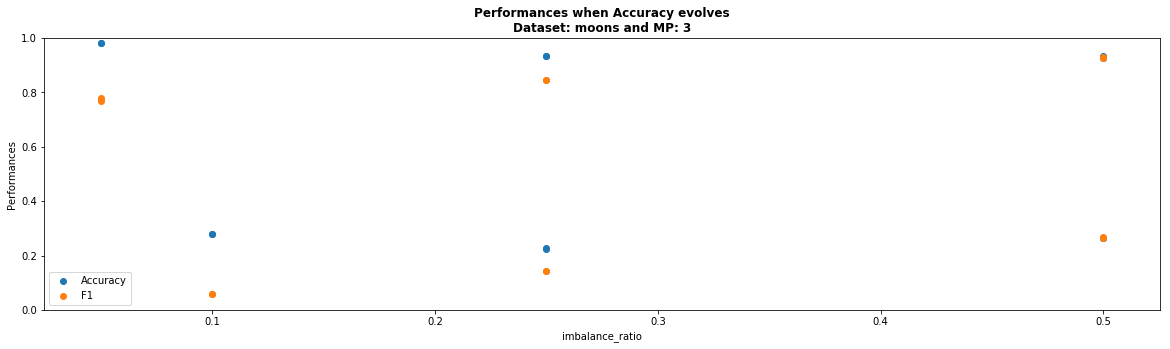

In [49]:
missingness_pattern=3
dataset_name = 'moons'



xname = 'imbalance_ratio'
yname = 'Accuracy'
yname2 = 'F1'

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.scatter(df.query( "`dataset_name`==@dataset_name & `missingness_pattern`==@missingness_pattern & `ratio_of_missing_values`==.2")[xname], 
df.query( "`dataset_name`==@dataset_name & `missingness_pattern`==@missingness_pattern & `ratio_of_missing_values`==.2")[yname], label=yname)
ax.scatter(df.query( "`dataset_name`==@dataset_name & `missingness_pattern`==@missingness_pattern & `ratio_of_missing_values`==.2")[xname], 
df.query( "`dataset_name`==@dataset_name & `missingness_pattern`==@missingness_pattern & `ratio_of_missing_values`==.2")[yname2], label=yname2)
#ax.scatter(df_moons.query( "`missingness_pattern`==@missingness_pattern")[xname], df_moons.query( "`missingness_pattern`==@missingness_pattern")[yname], label='moons')
ax.set_ylim([0,1])
plt.legend()

ax.set_xlabel(xname);ax.set_ylabel('Performances');ax.set_title("Performances when {} evolves\nDataset: {} and MP: {}".format(yname, dataset_name, missingness_pattern), weight='bold')


In [45]:
df

dataset_name  experiment_number             approach missing_data_handling            imputation_method use_missing_indicator_variables  num_samples  imbalance_ratio  missingness_pattern missingness_mechanism  ratio_of_missing_values  missing_X1  missing_X2 missing_first_quarter  ratio_missing_per_class_0  ratio_missing_per_class_1     auc  Accuracy       F1     MCC  Sensitivity  Specificity  Precision    PPV      NPV      FNR    FDR      FOR  resolution  bandwidth  estimation_time_0  estimation_time_1
0          moons                 61  multi_distributions               without                      without                             NaN         5000             0.25                    4                  MNAR                      NaN        True        True                 False                     0.0000                     0.9404     NaN   0.44200  0.49800  0.2750      1.00000        0.228      0.332  0.332  1.00000  0.00000  0.668  0.00000          30        0.2                NaN                NaN
1          moons                 59  multi_distributions               without                      without                             NaN         5000             0.25                    3                   MAR                      0.2        True       False                  True                        NaN                        NaN     NaN   0.22400  0.14200 -0.4820      0.25700        0.213      0.098  0.098  0.46400  0.74300  0.902  0.53600          30        0.2                NaN                NaN
2          moons                 66  multi_distributions               without                      without                             NaN         5000             0.50                    1                  MCAR                      0.0        True       False                   NaN                        NaN                        NaN     NaN   0.23900  0.23400 -0.5220      0.23400        0.244      0.233  0.233  0.24500  0.76600  0.767  0.75500          30        0.2                NaN                NaN
3          moons                 50  multi_distributions               without                      without                             NaN         5000             0.25                    1                  MCAR                      0.2        True       False                   NaN                        NaN                        NaN     NaN   0.41500  0.25900 -0.1450      0.41800        0.414      0.187  0.187  0.68800  0.58200  0.813  0.31200          30        0.2                NaN                NaN
4          moons                 68  multi_distributions               without                      without                             NaN         5000             0.50                    1                  MCAR                      0.5        True       False                   NaN                        NaN                        NaN     NaN   0.53600  0.53200  0.0730      0.54800        0.525      0.518  0.518  0.55500  0.45200  0.482  0.44500          30        0.2                NaN                NaN
..           ...                ...                  ...                   ...                          ...                             ...          ...              ...                  ...                   ...                      ...         ...         ...                   ...                        ...                        ...     ...       ...      ...     ...          ...          ...        ...    ...      ...      ...    ...      ...         ...        ...                ...                ...
366      circles                 22  single_distribution            imputation  multi_dimensional_weighting                             NaN         5000             0.25                    3                   MAR                      0.2        True       False                  True                        NaN                        NaN     NaN   0.93300  0.88400  0.8490      1.00000        0.910      0.792  0.792  1.

# Experiment X) Explainable Boosting Machine 

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier


from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.linear_model import SGDClassifier, LogisticRegression

from interpret.glassbox import ExplainableBoostingClassifier


def format_n(x):
    return "{0:.3f}".format(x)

random_state = 47
n_splits = 5


model = ExplainableBoostingClassifier(n_jobs=-1, random_state=random_state)

model.fit(X,y)
from interpret import show

ebm_global = model.explain_global()
show(ebm_global)

ss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.25, random_state=random_state)
scores = cross_validate(model, X, y, scoring='roc_auc', cv=ss, n_jobs=None, return_estimator=True)

record = dict()
record['model_name'] = 'EBM'
record['fit_time_mean'] = format_n(np.mean(scores['fit_time']))
record['fit_time_std'] = format_n(np.std(scores['fit_time']))
record['test_score_mean'] = format_n(np.mean(scores['test_score']))
record['test_score_std'] = format_n(np.std(scores['test_score']))
record

# Experiment X) XGBoost

In [ ]:
import xgboost as xgb


# Normalize the feature space to it has 0 mean and unitary std. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from xgboost import XGBClassifier
from ml import visualize_classifier, my_model, plot_PR_and_ROC_curves, evaluate_model
from sklearn.model_selection import train_test_split
def test_model(X=None,y=None,model=None,df=None, num_cv=None, verbose=False, th=.5, **kwargs):
    """
    Test model and append results to the df. 
    """
    fig, recall, precision, ths_pr, fpr, tpr, ths_roc = evaluate_model(num_cv=num_cv, 
                                                                       model=model,  
                                                                       X=X, 
                                                                       y=y, 
                                                                       threshold=th, 
                                                                       classes_names=['TD', 'ASD'],verbose=verbose, **kwargs)
    
    # Store the resutls
    df = df.append({'ExperimentName':model.name, 
                    'recall':recall, 
                    'precision':precision, 
                    'fpr':fpr, 
                    'tpr':tpr, 
                    'ths_roc': ths_roc,
                    'ths_pr': ths_pr},  ignore_index=True)
    
    return df

def plot_results_PR_and_ROC(df):
    import warnings
    warnings.filterwarnings("ignore", category=DeprecationWarning) 


    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        """
        Plot the pr and roc curves for the results saved in the pandas df. 
        """
        from plotly.subplots import make_subplots
        import plotly.graph_objects as go    

        """
        Define plot asthetics
        """
        ref_color = '#888E90'  # Color of reference lines
        colors = plt.get_cmap(name='Paired').colors  # color of each algorithm

        """
        PR curve
        """
        # (1) Initialize figures 
        fig = make_subplots(rows=1, cols=2)

        # (2) Add iso-fscore traces to PR curve
        # Add the iso-levels of f1
        f_scores = np.linspace(0.2, 0.8, num=4)
        for f_score in f_scores:
            x = np.linspace(0.01, 1)
            yy = f_score * x / (2 * x - f_score)
            fig.add_trace(go.Line(x=x[yy >= 0], y=yy[yy >= 0], name='f1={:2.1f}'.format(f_score), 
                        line=dict(color=ref_color)), row=1, col=1)
        fig.update_yaxes(title_text="Recall", scaleanchor = "x", scaleratio = 1, row=1, col=1)
        fig.update_xaxes(title_text="Precision", range=[0, 1], constrain='domain', row=1, col=1)
        fig.update_yaxes(range=(0, 1), constrain='domain', row=1, col=1)

        # (3) Add PR curve associated to each experiment
        for i,row in df.iterrows():
            precision = row['precision']
            recall = row['recall']
            name = row['ExperimentName']
            ths_pr = row['ths_pr']
            color = 'rgb{}'.format(colors[np.mod(i, len(colors))])
            fig.add_trace(go.Line(x=precision,y=recall, name=name, 
                                  line=dict(color=color), hovertext=ths_pr), row=1, col=1)

        """
        Plot ROC curve
        """
        # Init plot 
        fig.add_trace(go.Line(x=np.linspace(0,1,10), y=np.linspace(0,1,10),
                            line=dict(color=ref_color)), row=1, col=2)

        for i, row in df.iterrows():
            fpr = row['fpr']
            tpr = row['tpr']
            ths = row['ths_roc']
            name = row['ExperimentName']
            color = 'rgb{}'.format(colors[np.mod(i, len(colors))])
            fig.add_trace(go.Line(x=fpr,y=tpr, line=dict(color=color), hovertext=ths), row=1, col=2)
        fig.update_yaxes(title_text='TPR', scaleanchor = "x", scaleratio = 1, row=1, col=2)
        fig.update_xaxes(title_text='FPR', range=[0, 1], constrain='domain', row=1, col=2)
        fig.update_yaxes(range=(0, 1), constrain='domain', row=1, col=2)
        fig.update_layout(title="PR AND ROC curves")
    return fig

def test_set_of_features(data, feats, name, df, th=.5, algos=['knn']):

    
    filter_criteria =  ' `diagnosis` in [0,1] and `age` <= 36'
    
    # Define X and y for this example    
    X  = data.query(filter_criteria)[feats].to_numpy()
    y = data.query(filter_criteria)['diagnosis'].to_numpy()

    # Check the methods and compare fitting all data (cv=0) with CV
    for i,algo in enumerate(algos):
        print('-------------------------')
        print('{} || {} '.format(name, algo))
        print('-------------------------')
        
        for cv in [16]:
            model = my_model(method=algo, name='{}::{}-{}cv'.format(name, algo, cv), **parameters[algo])            
            df = test_model(X=X,y=y,df=df, model=model, num_cv=cv, verbose=True, th=th)   
    return df


train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, stratify=y)


parameters={'knn': {}, 
            'xgboost' : {}, 
            'nb': {}}

parameters['xgboost'] = {'n_estimators' : 100,
                         'max_depth' : 2,
                         'min_child_weight' : 3,
                         'colsample_bytree' : .8, 
                         'colsample_bynode' : .8
                        }

parameters_fit={'knn': {}, 
                'xgboost' : {}}
parameters_fit['xgboost'] = {'early_stopping_rounds' : 5,
                             #'eval_set' : [(test_X, test_y)],
                             'verbose' : 0}



#model = my_model(method='xgboost', name='xgboost', **parameters['xgboost'])
#model.fit(X, y, balanced=True, **parameters_fit['xgboost'])

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

algos = ['knn', 'nb', 'xgboost']
# Create a df to store all the results of each experiement
results_summary = pd.DataFrame({'ExperimentName':[], 'recall':[], 'precision':[], 'fpr':[], 'tpr':[]})

    
plt.figure(figsize=[20,10])
# Check the methods and compare fitting all data (cv=0) with CV
for i,algo in enumerate(algos):
    for cv in [0]:
        model = my_model(method=algo, name='{}-{}cv'.format(algo, cv), **parameters[algo])
        results_summary = test_model(X=X,y=y,df=results_summary, model=model, num_cv=cv)    
        
fig = plot_results_PR_and_ROC(results_summary)
fig.show()


from sklearn.metrics import plot_roc_curve
features_dict = {'all':['proportion_of_name_call_responses', 'average_response_to_name_delay',
                         'gaze_silhouette_score', 'mean_gaze_percent_right', 'FP_gaze_speech_correlation',
                         'S_postural_sway', 'NS_postural_sway',
                         'pop_rate', 'average_force_applied', 'average_length', 'number_of_touches', 'average_touch_duration','average_error'],
                 'all+age':['age','proportion_of_name_call_responses', 'average_response_to_name_delay',
                             'gaze_silhouette_score', 'mean_gaze_percent_right', 'FP_gaze_speech_correlation',
                             'S_postural_sway', 'NS_postural_sway',
                             'pop_rate', 'average_force_applied', 'average_length', 'number_of_touches', 'average_touch_duration','average_error'],
                 
                 'gaze' : ['BB_gaze_percent_right', 'BB_gaze_silhouette_score', 'S_gaze_percent_right', 
                           'S_gaze_silhouette_score', 'FP_gaze_speech_correlation','FP_gaze_silhouette_score'],
                 
                 'RTN' : ['proportion_of_name_call_responses', 'average_response_to_name_delay'],
                 
                 'postural' : ['S_postural_sway', 'NS_postural_sway'],
                 
                 'touch' : ['pop_rate', 'average_force_applied', 'average_length', 'number_of_touches', 'average_touch_duration','average_error']
                }
results_summary = pd.DataFrame({'ExperimentName':[], 'recall':[], 'precision':[], 'fpr':[], 'tpr':[]})

for name, feats in features_dict.items():
    print('\n')
    print('-------------------------')
    print('{} '.format(name))
    print('-------------------------')

    filter_criteria =  ' `diagnosis` in [0,1] and `age` <= 36'
    
    # Define X and y for this example    
    X  = data.query(filter_criteria)[feats].to_numpy()
    y = data.query(filter_criteria)['diagnosis'].to_numpy()
    
    model = my_model(method='xgboost', name='xgboost', **parameters['xgboost'])
    model.fit(X, y, balanced=True)
    model.model.get_booster().feature_names = feats
    
    #df = test_model(X=X,y=y,df=df, model=model, num_cv=cv, verbose=True, th=.5)
    plot_roc_curve(model, X, y, name=name) 
    xgb.plot_importance(model.model.get_booster(),  height=0.7)
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    xgb.plot_tree(model.model.get_booster(), num_trees=model.model.best_iteration, ax=ax)
    plt.show()

    
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

xgb.plot_tree(model.model.get_booster(), num_trees=model.model.best_iteration, ax=ax)

#model.model.get_booster().feature_names = feats
xgb.plot_importance(model.model.get_booster(),  height=0.7)


from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
import xgboost as xgb
import multiprocessing


xgb_model = xgb.XGBRegressor(n_jobs=multiprocessing.cpu_count() // 2)
clf = GridSearchCV(xgb_model, {'max_depth': [2, 4, 6],
                               'n_estimators': [50, 100, 200]}, verbose=1,
                   n_jobs=2)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_params_)


# Experiment on the data imputation confidence! 

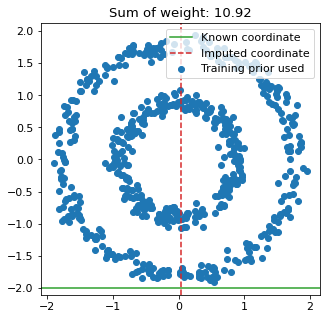

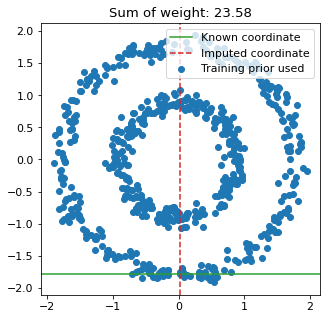

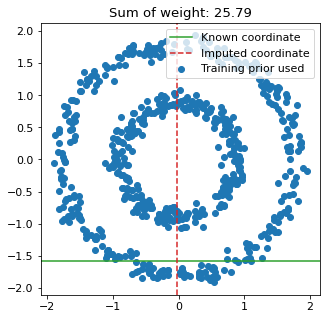

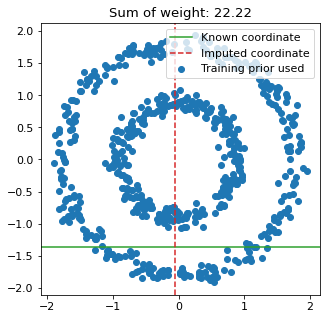

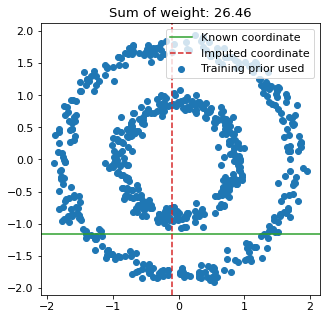

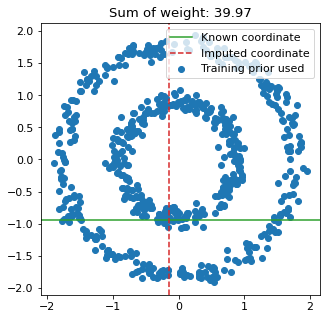

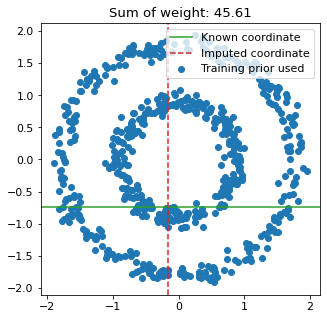

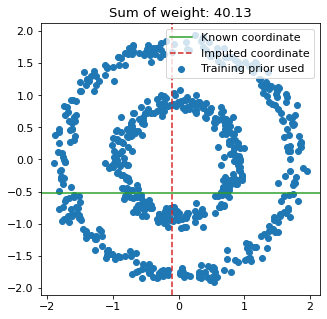

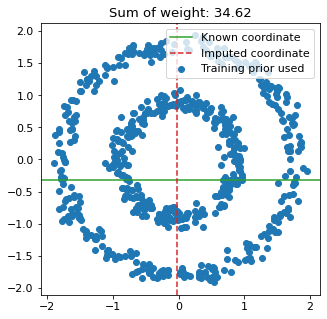

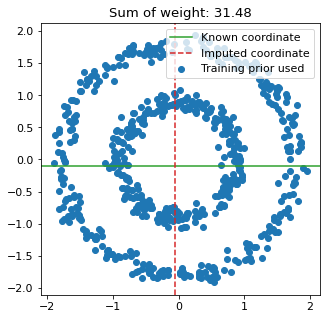

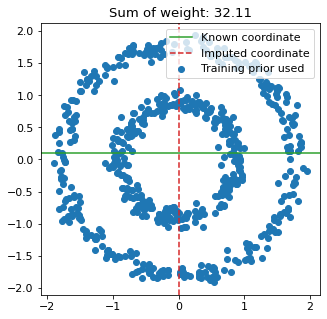

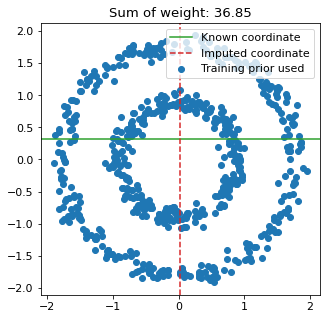

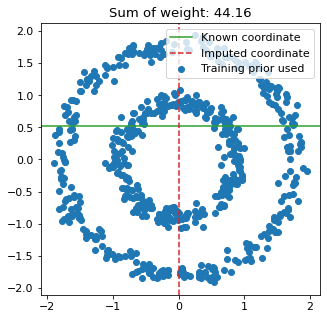

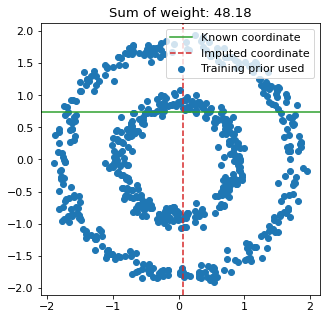

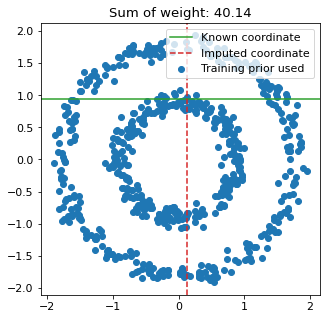

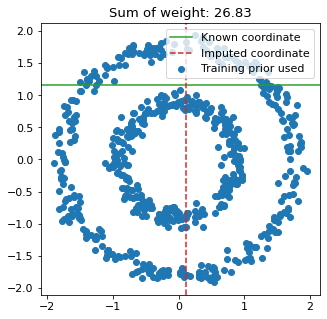

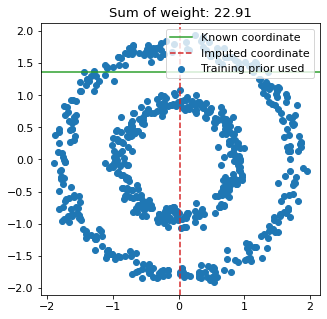

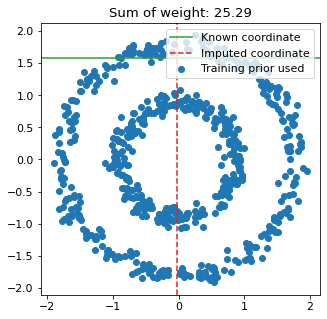

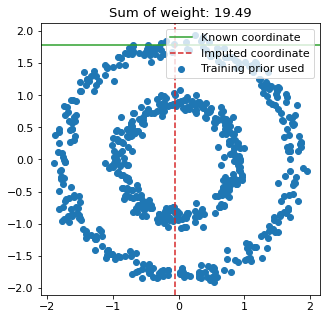

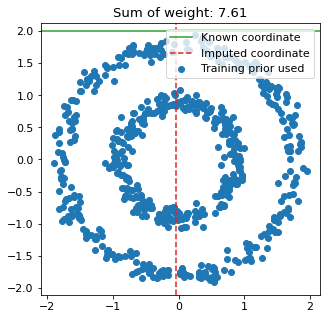

In [73]:



X_i = self.dataset_test.X[5]
w_list = []
a_list = np.linspace(-2, 2, 20)
for a in np.linspace(-2, 2, 20):
    X_i = np.array([np.nan, a])
    from copy import deepcopy
    h=bandwidth
    """
    Contribution of the X_i sample to the estimation of the pdf of X at x. 
    X_prior contains the samples for which there is no missing values, which are used as prior when the contribution of sample with partially missing data is calculated.
    """
    k = X_i.shape[0]  # dimension of the space of samples. 


    # Copy the feature value 
    hat_X_i = deepcopy(X_i)


    # Perform imputation if needed
    coords_missing = np.isnan(X_i)  # unknown coordinates of X_i
    for j in range(k):        
        if coords_missing[j]:  # we don't know the j-th coordinate, we need to impute it

            # We use the term associate to the j-th coordinate for the 
            # rest of the samples in the training set (for which the j-th component is know).
            # The contribution of each term is weighted with the distance to the sample hyperplane.
            hat_X_ij = 0
            Ws = 1e-10  # eps
            for X_p in X_prior:
                w_p = W(X_i, X_p)
                hat_X_ij += w_p * X_p[j]
                Ws += w_p
            hat_X_ij /= Ws

            hat_X_i[j] = hat_X_ij



    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.scatter(X_prior[:,0], X_prior[:,1], label='Training prior used')
    if coords_missing[0]:
        ax.axhline(y=X_i[1], color='tab:green', label='Known coordinate')
        ax.axvline(x=hat_X_i[0], color='tab:red', linestyle='--',  label='Imputed coordinate')
    elif coords_missing[1]:
        ax.axvline(x=X_i[0], color='tab:green', label='Known coordinate')
        ax.axhline(y=hat_X_i[1], color='tab:red', linestyle='-.', label='Imputed coordinate')
    ax.set_title("Sum of weight: {:.2f}".format(Ws))
    plt.legend()
    w_list.append(Ws)

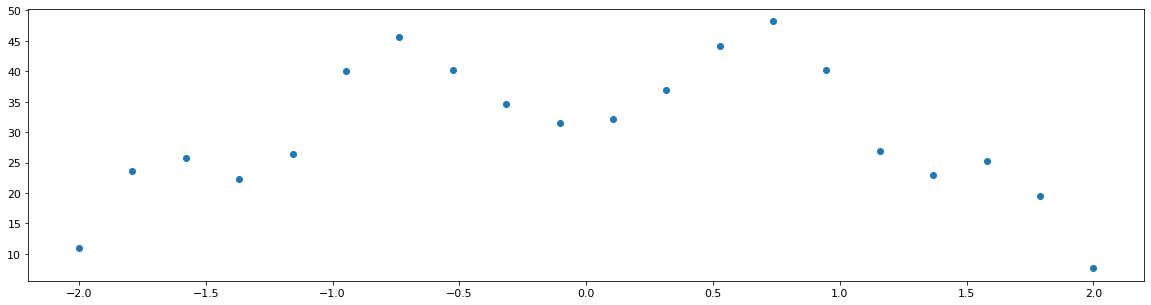

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.scatter(a_list, w_list, label='Training prior used')

(array([ 2.,  1.,  9.,  7.,  7.,  5.,  7.,  7.,  8.,  3.,  8.,  1.,  4.,
         3.,  3.,  1.,  8.,  1.,  2.,  2.,  6.,  5.,  3.,  8.,  7., 11.,
        10.,  7., 10., 12., 12., 12., 10.,  9.,  8., 11.,  8.,  9.,  7.,
         5.,  5.,  8., 13., 12.,  5., 11.,  6.,  6.,  5.,  6.,  7.,  6.,
        10.,  4.,  3.,  5.,  6., 10.,  9.,  8.,  5.,  6.,  6.,  9.,  7.,
         4., 14., 14., 11., 13., 10., 10.,  9.,  9.,  3.,  3.,  5.,  5.,
         3.,  3.,  2.,  4.,  4.,  2.,  9.,  2.,  4.,  4.,  8.,  5.,  4.,
         5.,  8.,  7.,  6.,  3.,  4.,  4.,  1.,  1.]),
 array([-1.90212367, -1.86353119, -1.82493871, -1.78634622, -1.74775374,
        -1.70916126, -1.67056877, -1.63197629, -1.5933838 , -1.55479132,
        -1.51619884, -1.47760635, -1.43901387, -1.40042139, -1.3618289 ,
        -1.32323642, -1.28464393, -1.24605145, -1.20745897, -1.16886648,
        -1.130274  , -1.09168152, -1.05308903, -1.01449655, -0.97590406,
        -0.93731158, -0.8987191 , -0.86012661, -0.82153413, -0.782941

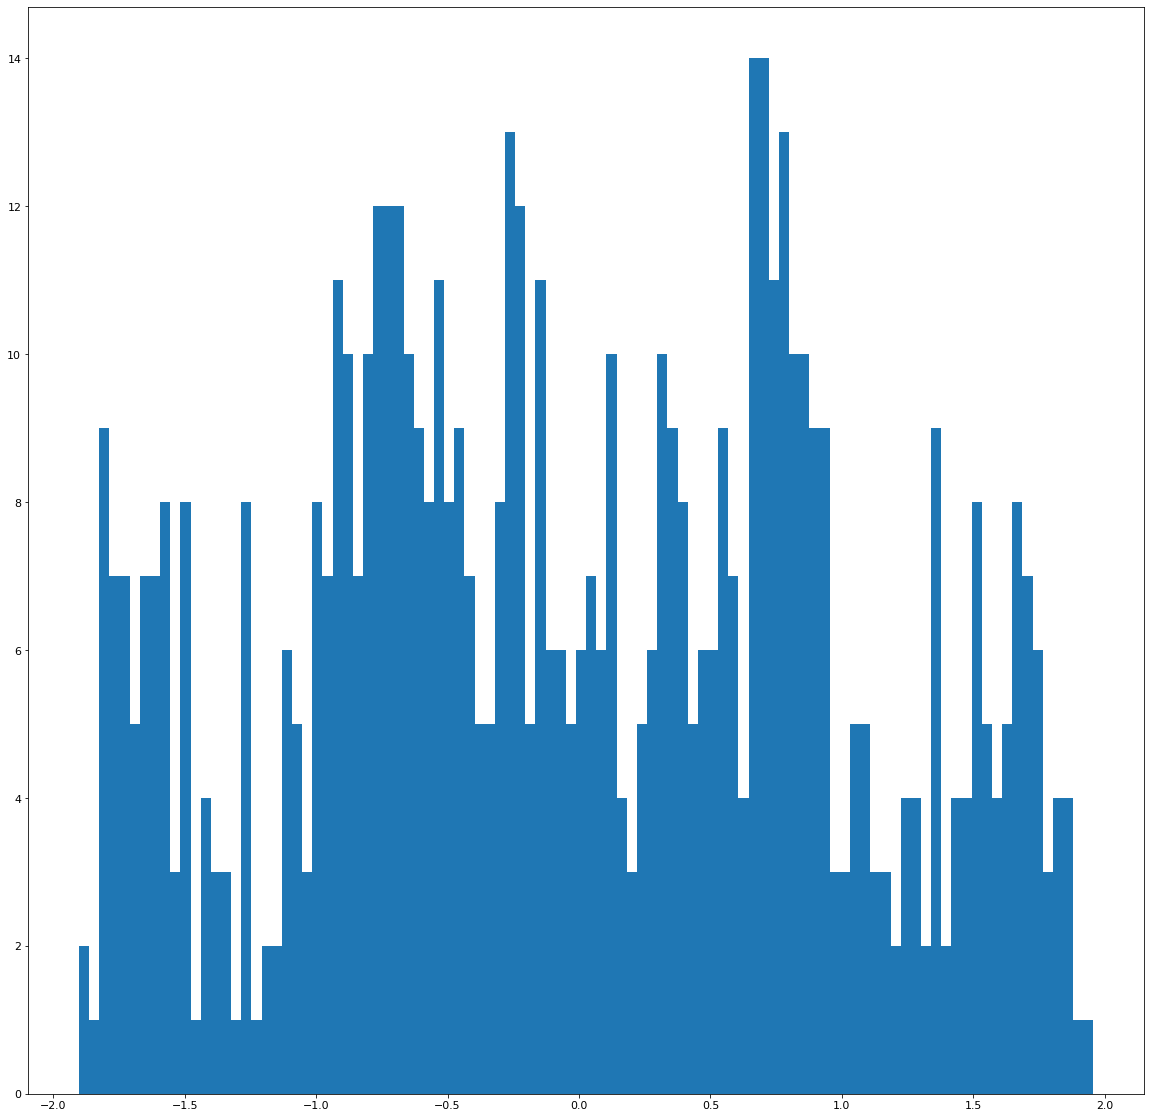

In [80]:
fi(20,20)
plt.hist(X_prior[:,0], bins=100)

In [77]:
X_prior

array([[-1.77376447,  0.10066745],
       [-0.51293983,  0.72030419],
       [ 0.93408859, -0.02222138],
       ...,
       [ 0.88751608, -0.38326858],
       [ 0.4311868 ,  0.73814206],
       [ 0.15760208,  0.78081698]])